## Imports, etc.

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [83]:
import datetime
import json
import numpy as np
import os
import pandas as pd
from plotnine import *

In [84]:
import snowflake.connector

conn = snowflake.connector.connect(
        user=os.environ["SNOWFLAKE_USER"],
        password=os.environ["SNOWFLAKE_PASSWORD"],
        account=os.environ["SNOWFLAKE_ACCOUNT"],
    )

In [5]:
import sys
sys.path.insert(0,'../')

## Example Crop

In [5]:
m_supply_forecasting_component_salable_mass_preds = pd.read_sql("""
    select *
    from predict.m_supply_forecasting_component_salable_mass
    where crop_id = 194173
""",conn)
m_supply_forecasting_component_salable_mass_preds.transpose()

,0
T2_ID,1
TASK_ID,546812
CROP_ID,194173
FARM_ID,2
COMPONENT_ID,10
COMPONENT_NAME,Green Romaine
HARVEST_DATE,2022-05-01
SALABLE_MASS_LBS,30.789
FINISHED_GOODS_LBS,20.1094
SALABLE_MASS_LBS_PREDICTED,28.414


In [6]:
f_harvests = pd.read_sql("""
    select *
    from warehouse.f_harvests
    where crop_id = 194173
""",conn)
f_harvests.transpose()

,0
SCHEDULED_ON,2022-05-01
FARM_ID,2
COMPONENT_ID,10
COMPONENT_NAME,Green Romaine
COMMERCIAL_CATEGORY,Core
CULTIVAR_ID,90
CULTIVAR_NAME,Green Forest
TASK_ID,546812
CROP_ID,194173
STAGE_ID,1467357


In [7]:
m_crop_mass = pd.read_sql("""
    select *
    from predict.m_crop_mass
    where crop_id = 194173
""",conn)

m_crop_mass.transpose()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
HOUR_STARTING_AT_LOCAL,2022-04-22 12:00:00,2022-04-28 12:00:00,2022-04-06 12:00:00,2022-04-24 12:00:00,2022-04-23 12:00:00,2022-04-11 12:00:00,2022-04-16 12:00:00,2022-04-18 12:00:00,2022-04-08 12:00:00,2022-04-14 12:00:00,...,2022-04-27 12:00:00,2022-04-17 12:00:00,2022-04-19 12:00:00,2022-04-09 12:00:00,2022-04-05 12:00:00,2022-04-10 12:00:00,2022-04-07 12:00:00,2022-04-29 12:00:00,2022-04-30 12:00:00,2022-04-12 12:00:00
HOUR_STARTING_AT,2022-04-22 16:00:00,2022-04-28 16:00:00,2022-04-06 16:00:00,2022-04-24 16:00:00,2022-04-23 16:00:00,2022-04-11 16:00:00,2022-04-16 16:00:00,2022-04-18 16:00:00,2022-04-08 16:00:00,2022-04-14 16:00:00,...,2022-04-27 16:00:00,2022-04-17 16:00:00,2022-04-19 16:00:00,2022-04-09 16:00:00,2022-04-05 16:00:00,2022-04-10 16:00:00,2022-04-07 16:00:00,2022-04-29 16:00:00,2022-04-30 16:00:00,2022-04-12 16:00:00
CROP_ID,194173,194173,194173,194173,194173,194173,194173,194173,194173,194173,...,194173,194173,194173,194173,194173,194173,194173,194173,194173,194173
TRAY_ID,4447,4447,3223,4447,4447,3223,4447,4447,3223,4447,...,4447,4447,4447,3223,3223,3223,3223,4447,4447,3223
FAILURE_PROBABILITY,0.00593662,0.00282073,0.0234692,0.0062421,0.00447837,0.0168753,0.034472,0.0256078,0.0164077,0.0367693,...,0.00376743,0.0367463,0.0231518,0.0157443,0.0391791,0.024869,0.0183626,0.00282452,0.00269172,0.0171385
Q10_PREDICTED_HARVEST_MASS_LBS,15.7914,19.5388,17.6736,18.3878,17.0235,18.7891,17.8894,17.1366,17.5976,18.5916,...,19.4548,17.4624,16.4465,18.001,17.9124,18.1405,17.5839,19.6034,19.8054,19.0988
Q50_PREDICTED_HARVEST_MASS_LBS,22.9554,25.8518,26.2698,24.7185,24.228,27.1382,26.267,25.2384,25.9334,27.0192,...,25.473,25.7099,24.4173,26.2811,26.2565,26.8206,26.0631,26.215,26.9287,27.2004
Q90_PREDICTED_HARVEST_MASS_LBS,29.6841,32.3245,35.5854,31.2957,30.9783,35.3822,34.3318,33.1513,34.2883,35.3439,...,31.8871,33.7556,32.4285,34.761,35.7737,35.8416,34.8959,32.8442,33.779,35.27
MODEL_PATH,38bf5bd1468d451281f64471e2fac372,38bf5bd1468d451281f64471e2fac372,38bf5bd1468d451281f64471e2fac372,38bf5bd1468d451281f64471e2fac372,38bf5bd1468d451281f64471e2fac372,38bf5bd1468d451281f64471e2fac372,38bf5bd1468d451281f64471e2fac372,38bf5bd1468d451281f64471e2fac372,38bf5bd1468d451281f64471e2fac372,38bf5bd1468d451281f64471e2fac372,...,38bf5bd1468d451281f64471e2fac372,38bf5bd1468d451281f64471e2fac372,38bf5bd1468d451281f64471e2fac372,38bf5bd1468d451281f64471e2fac372,38bf5bd1468d451281f64471e2fac372,38bf5bd1468d451281f64471e2fac372,38bf5bd1468d451281f64471e2fac372,38bf5bd1468d451281f64471e2fac372,38bf5bd1468d451281f64471e2fac372,38bf5bd1468d451281f64471e2fac372
MODEL_DESCRIPTION,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [8]:
m_crop_mass.query("HOUR_STARTING_AT=='2022-04-30 16:00:00'").transpose()

,24
HOUR_STARTING_AT_LOCAL,2022-04-30 12:00:00
HOUR_STARTING_AT,2022-04-30 16:00:00
CROP_ID,194173
TRAY_ID,4447
FAILURE_PROBABILITY,0.00269172
Q10_PREDICTED_HARVEST_MASS_LBS,19.8054
Q50_PREDICTED_HARVEST_MASS_LBS,26.9287
Q90_PREDICTED_HARVEST_MASS_LBS,33.779
MODEL_PATH,38bf5bd1468d451281f64471e2fac372
MODEL_DESCRIPTION,2


## Data

### Shortfall Estimates

In [9]:
qry = """
    with preds as (
    
        select m.*, 
          c.component_name,
          computed_at_timestamp:: date as computed_at_date
        from predict.m_inflight_fulfillment_preds m
        inner join warehouse.dm_components c using (component_id)
        where farm_id in (1,2)
          and component_id in (15,16,17,28,48)
          and computed_at_date = '2022-05-01'      
    )
    
    select *
    from preds
    qualify rank() over(partition by 1 order by computed_at_timestamp desc) = 1
    order by delivery_scheduled_on
"""
predictions = pd.read_sql(qry,conn)

In [10]:
predictions.head()

,COMPONENT_ID,FARM_ID,DELIVERY_SCHEDULED_ON,HARVEST_SCHEDULED_ON,DEMAND_MINUS_SUPPLY_PDF_LESS_THAN_ZERO,DEMAND_MINUS_SUPPLY_Q10,DEMAND_MINUS_SUPPLY_Q50,DEMAND_MINUS_SUPPLY_Q90,DEMAND_MINUS_SUPPLY_MEAN,HARVEST_MEAN,DEMAND_MEAN,DEMAND_MINUS_SUPPLY_SKETCH,COMPUTED_AT_TIMESTAMP,COMPONENT_NAME,COMPUTED_AT_DATE
0,15,2,2022-05-02,2022-05-01,0.93,-579.15,-307.57,-36.00,-307.57,138.97,20.55,"N(-307.57,211.91)",2022-05-01 23:16:44,Basil,2022-05-01
1,28,1,2022-05-02,2022-05-01,0.97,-23.52,-13.88,-4.24,-13.88,5.18,0.56,"N(-13.88,7.52)",2022-05-01 23:16:44,Purple Mustard,2022-05-01
2,28,2,2022-05-02,2022-05-01,1.00,2.25,2.25,2.25,2.25,0.00,2.25,float,2022-05-01 23:16:44,Purple Mustard,2022-05-01
3,15,1,2022-05-02,2022-05-01,0.87,-120.02,-56.02,7.98,-56.02,0.00,22.59,"N(-56.02,49.94)",2022-05-01 23:16:44,Basil,2022-05-01
4,15,2,2022-05-03,2022-05-02,0.95,-623.55,-350.48,-77.41,-350.48,176.19,133.28,"N(-350.48,213.08)",2022-05-01 23:16:44,Basil,2022-05-01


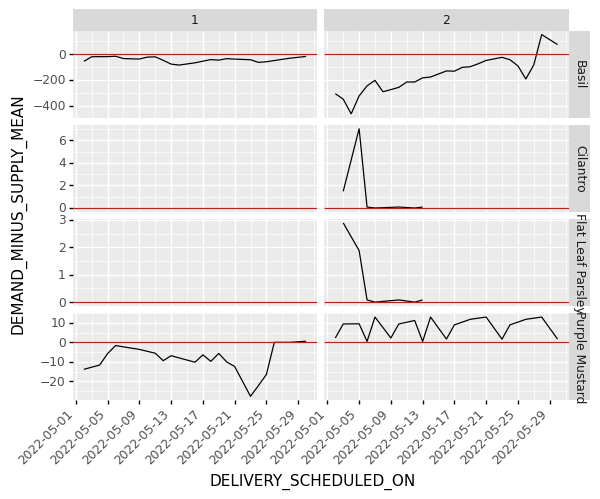

<ggplot: (360266385)>

In [11]:
(
    predictions
    .assign(DEMAND_MINUS_SUPPLY_MEAN = lambda x: x['DEMAND_MINUS_SUPPLY_MEAN'].astype(float))
    .assign(DELIVERY_SCHEDULED_ON = lambda x: pd.to_datetime(x['DELIVERY_SCHEDULED_ON']))
    
    .pipe(lambda x: ggplot(x, aes(x='DELIVERY_SCHEDULED_ON')) +
         geom_line(mapping=aes(y='DEMAND_MINUS_SUPPLY_MEAN')) +
         facet_grid(['COMPONENT_NAME','FARM_ID'], scales='free') +
         geom_hline(yintercept=0,color='red') +
         theme(axis_text_x=element_text(hjust=1,rotation=45)))
)

### Find Single-crop skus at F1, F2

In [12]:
qry = """
    with ordered_skus as (
        select distinct sku_id, sku_name
        from warehouse.dm_line_items
        where farm_id in (1,2)
        and delivery_scheduled_on between '2022-04-01' and '2022-05-15'
    ),
    formulations as (
        select s.*, 
          key as component,
          value/100.0 as ratio
        from warehouse.dm_skus s,
        lateral flatten(input=>s.component_ratio)
    ),
    ratio_is_1 as (
        select component,
            min(ratio) as min_ratio, 
            max(ratio) as max_ratio
        from formulations f
        inner join 
        ordered_skus k 
        using (sku_id)
        group by component
        having min_ratio = 1.0
    )
    select sku_id,
        sku_name,
        component,
        component_ratio
    from formulations f
    inner join ratio_is_1 r
    using (component)
    inner join 
    ordered_skus o using (sku_id)
    order by component, sku_id
"""
single_sku = pd.read_sql(qry,conn)
single_sku

,SKU_ID,SKU_NAME,COMPONENT,COMPONENT_RATIO
0,331,Mustard (1 x 3lb bag),13,"{\n ""13"": 100\n}"
1,26,Basil (1 x 3lb bag),15,"{\n ""15"": 100\n}"
2,243,Basil (6 x 1.25oz clamshell),15,"{\n ""15"": 100\n}"
3,338,Basil WFNE (6 x 1.25oz clamshell),15,"{\n ""15"": 100\n}"
4,242,Parsley (6 x 1.25oz clamshell),16,"{\n ""16"": 100\n}"
5,28,Cilantro (1 x 3lb bag),17,"{\n ""17"": 100\n}"
6,241,Cilantro (6 x 1.25oz clamshell),17,"{\n ""17"": 100\n}"
7,337,Thai Basil (6 x 1.25 clamshell),20,"{\n ""20"": 100\n}"
8,201,Mustard Frills (1 x 3lb bag),28,"{\n ""28"": 100\n}"
9,213,Mustard Frills (6 x 1.5oz clamshell),28,"{\n ""28"": 100\n}"


### Actual fulfillment

In [233]:
qry = """
    select *, 
        case when lower(sku_name) like '%basil%' then 'Basil'
             when lower(sku_name) like '%parsley%' then 'Flat Leaf Parsley'
             when lower(sku_name) like '%cilantro%' then 'Cilantro'
             when lower(sku_name) like '%mustard%' then 'Purple Mustard'
             when lower(sku_name) like '%chrysanthemum%' then 'Chrysanthemum Greens'
             else '' end as component_name
    from warehouse.dm_line_items
    where farm_id in (1,2)
      and delivery_scheduled_on between '2022-04-01' and '2022-05-15'
      and (lower(sku_name) like '%basil%'
        or lower(sku_name) like '%parsley%'
        or lower(sku_name) like '%cilantro%'
        or lower(sku_name) like '%mustard%'
        or lower(sku_name) like '%chrysanthemum%')
      and channel_category in ('primary')
      and order_status not in ('canceled','pending')
"""

primary_line_items = pd.read_sql(qry,conn)

In [ ]:
primary_line_items

In [234]:
line_items_daily = (
    primary_line_items.groupby(['FARM_ID','DELIVERY_SCHEDULED_ON','COMPONENT_NAME'])
    .agg(weight_ordered_lbs     = pd.NamedAgg('WEIGHT_ORDERED_LBS','sum'),
         weight_shipped_lbs     = pd.NamedAgg('WEIGHT_SHIPPED_LBS','sum'),
         weight_to_allocate_lbs = pd.NamedAgg('WEIGHT_TO_ALLOCATE_LBS','sum'),
         weight_allocated_lbs   = pd.NamedAgg('WEIGHT_ALLOCATED_LBS','sum'))
    .reset_index()
    .assign(DELIVERY_SCHEDULED_ON = lambda x: pd.to_datetime(x['DELIVERY_SCHEDULED_ON']))
    .pipe(lambda x: pd.melt(x, id_vars=['FARM_ID','DELIVERY_SCHEDULED_ON','COMPONENT_NAME']))
)

/Users/pmccarthy/git/inflight_fulfillment/venv/lib/python3.9/site-packages/plotnine/geoms/geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
/Users/pmccarthy/git/inflight_fulfillment/venv/lib/python3.9/site-packages/plotnine/geoms/geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


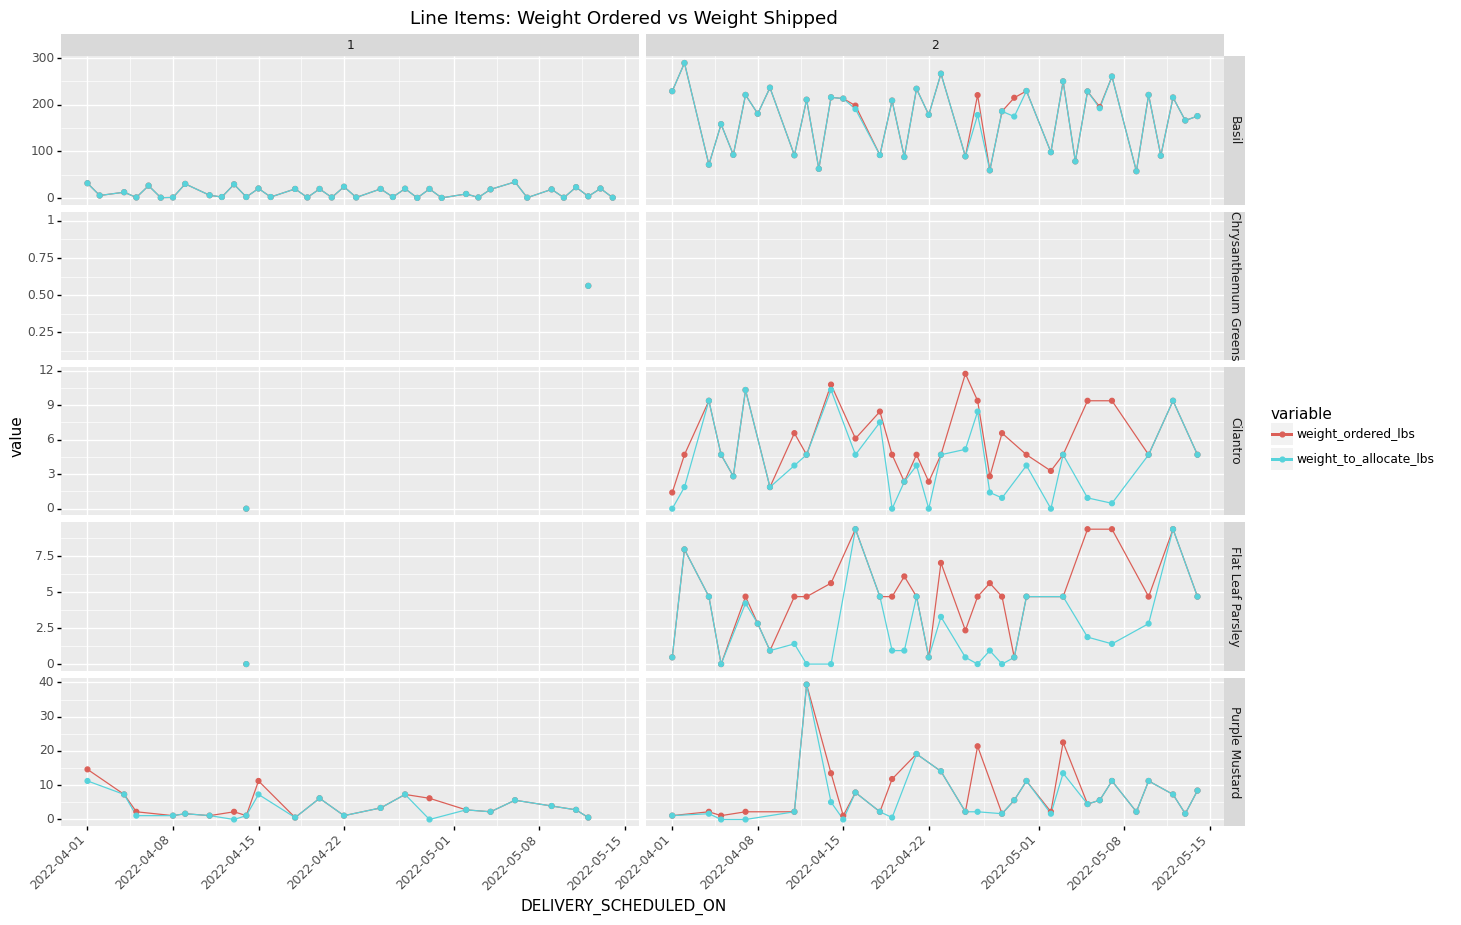

<ggplot: (392864726)>

In [238]:
(
    line_items_daily.assign(FARM = lambda x: x['FARM_ID'].astype(str))
    .query("variable in ['weight_to_allocate_lbs','weight_ordered_lbs']")
    .pipe(lambda x: ggplot(x, aes(x='DELIVERY_SCHEDULED_ON',y='value',color='variable')) + 
         facet_grid(['COMPONENT_NAME','FARM'],scales='free') +
         geom_line() + 
         geom_point() +
         theme(axis_text_x=element_text(hjust=1,rotation=45),
               figure_size=(15,10)) +
         ggtitle("Line Items: Weight Ordered vs Weight Shipped")
         )
)

In [15]:
qry = """
    select *, 
        case when lower(sku_name) like '%basil%' then 'Basil'
             when lower(sku_name) like '%parsley%' then 'Flat Leaf Parsley'
             when lower(sku_name) like '%cilantro%' then 'Cilantro'
             when lower(sku_name) like '%mustard%' then 'Purple Mustard'
             when lower(sku_name) like '%chrysanthemum%' then 'Chrysanthemum Greens'
             else '' end as component_name
    from warehouse.dm_line_items
    where farm_id in (1,2)
      and delivery_scheduled_on between '2022-04-01' and '2022-05-15'
      and (lower(sku_name) like '%basil%'
        or lower(sku_name) like '%parsley%'
        or lower(sku_name) like '%cilantro%'
        or lower(sku_name) like '%mustard%'
        or lower(sku_name) like '%chrysanthemum%')
      and channel_category in ('non-revenue')
      and lower(customer_name) like '%tranship%'
      and order_status not in ('canceled','pending')
"""

transship_line_items = pd.read_sql(qry,conn)

In [16]:
transship_line_items['CUSTOMER_NAME'].unique()

array(['Bowery Internal Tranship F1 -> F2',
       ' Bowery Internal Tranship Baldor',
       'Bowery Internal Tranship F2 -> F1'], dtype=object)

In [17]:
transship_items_daily = (
    transship_line_items.groupby(['FARM_ID','DELIVERY_SCHEDULED_ON','COMPONENT_NAME'])
    .agg(weight_ordered_lbs = pd.NamedAgg('WEIGHT_ORDERED_LBS','sum'),
         weight_shipped_lbs = pd.NamedAgg('WEIGHT_SHIPPED_LBS','sum'))
    .reset_index()
    .assign(DELIVERY_SCHEDULED_ON = lambda x: pd.to_datetime(x['DELIVERY_SCHEDULED_ON']))
    .pipe(lambda x: pd.melt(x, id_vars=['FARM_ID','DELIVERY_SCHEDULED_ON','COMPONENT_NAME']))
)

/Users/pmccarthy/git/inflight_fulfillment/venv/lib/python3.9/site-packages/plotnine/geoms/geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
/Users/pmccarthy/git/inflight_fulfillment/venv/lib/python3.9/site-packages/plotnine/geoms/geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


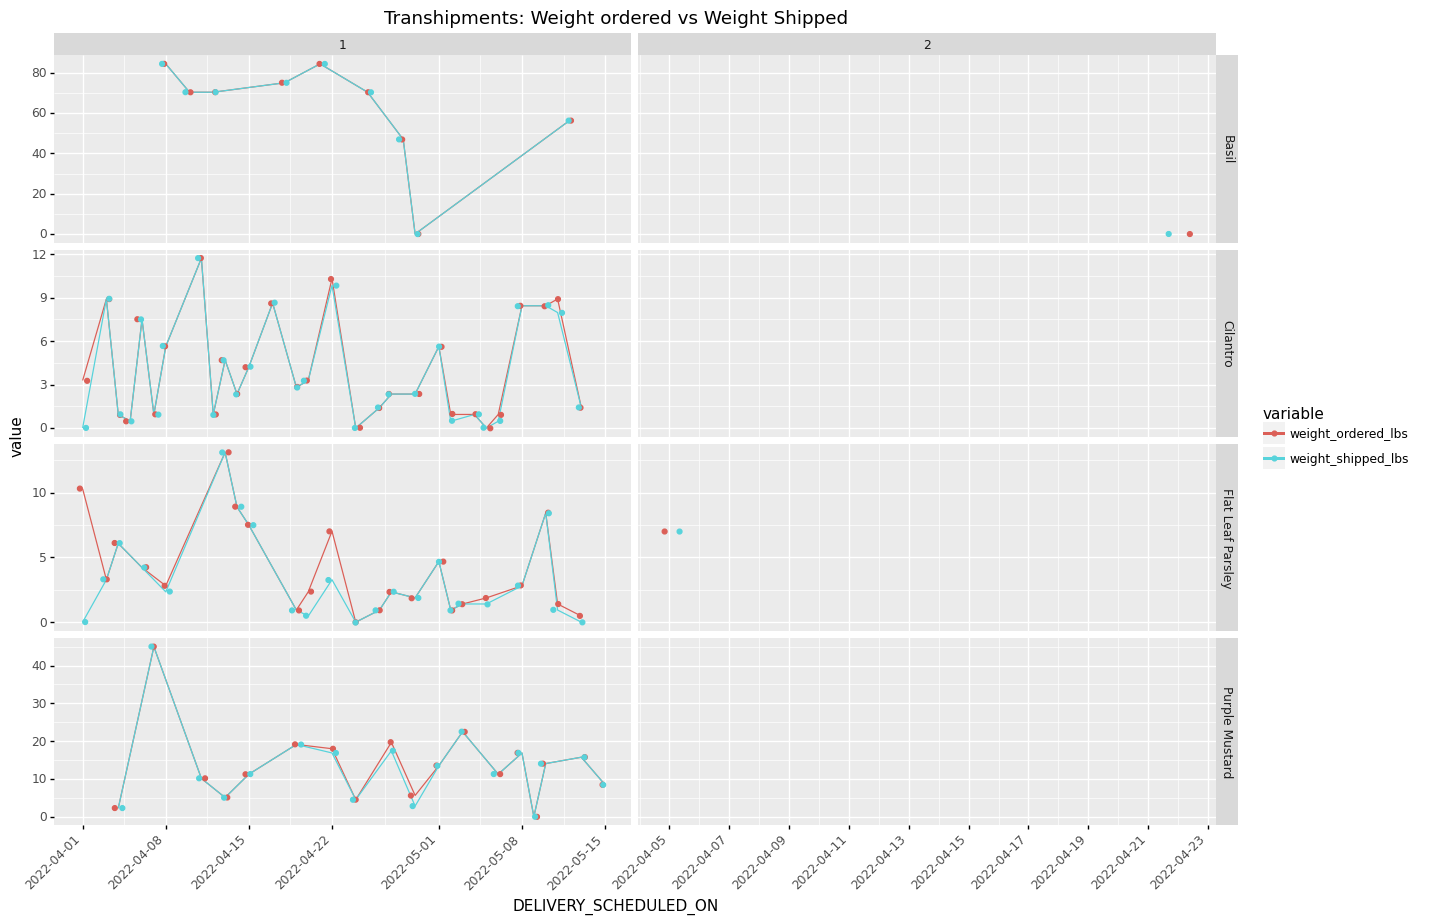

<ggplot: (361069309)>

In [19]:
(
    transship_items_daily.assign(FARM = lambda x: x['FARM_ID'].astype(str))
    .pipe(lambda x: ggplot(x, aes(x='DELIVERY_SCHEDULED_ON',y='value',color='variable')) + 
         facet_grid(['COMPONENT_NAME','FARM'],scales='free') +
         geom_line() + 
         geom_jitter() +
         theme(axis_text_x=element_text(hjust=1,rotation=45),
               figure_size=(15,10))
         ) +
         ggtitle("Transhipments: Weight ordered vs Weight Shipped")
)

### Harvests

In [20]:
qry = """
    select f.*,
        c.finished_goods_lbs,
        case when task_source = 'completed_task' then stage_completed_at_local::date
             when task_source = 'deleted_stage' then original_scheduled_on
        end as stage_complete_or_scheduled_date
    from warehouse.f_harvests f
    inner join
    warehouse.dm_crops c
    using (crop_id)
    where farm_id in (1,2)
      and component_id in (15,16,17,28,48)
      and scheduled_on between '2022-04-01' and '2022-05-15'
"""
harvests = pd.read_sql(qry,conn)

In [21]:
harvests['COMPONENT_NAME'].unique()

array(['Flat Leaf Parsley', 'Basil', 'Purple Mustard', 'Cilantro',
       'Chrysanthemum Greens'], dtype=object)

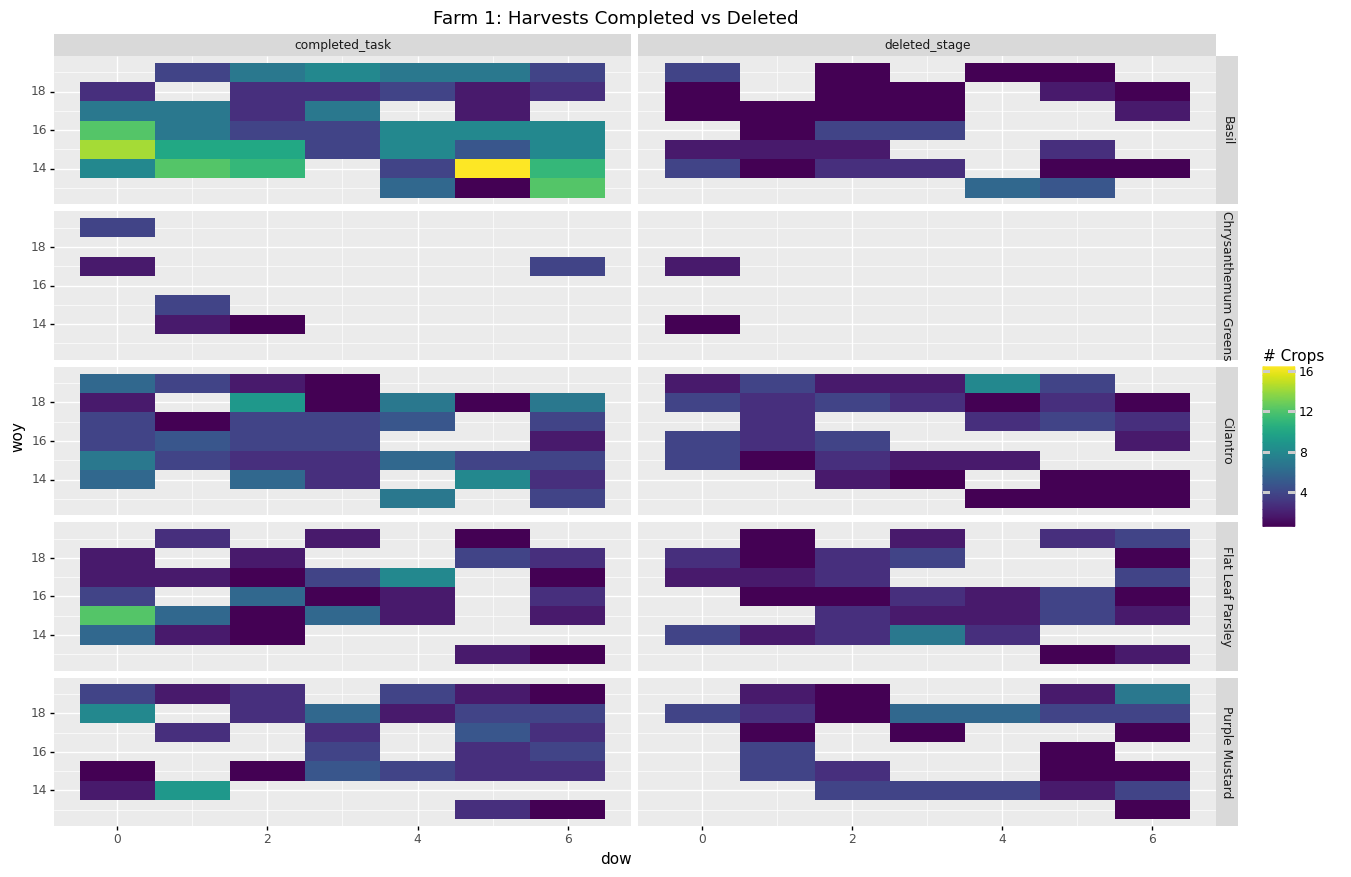

<ggplot: (361335616)>

In [22]:
farm_id = 1
(
    harvests
    .query(f"FARM_ID == {farm_id}")
    .groupby(['STAGE_COMPLETE_OR_SCHEDULED_DATE','COMPONENT_NAME','TASK_SOURCE'])['CROP_ID'].nunique()
    .reset_index()
    .assign(STAGE_COMPLETE_OR_SCHEDULED_DATE=lambda x: pd.to_datetime(x['STAGE_COMPLETE_OR_SCHEDULED_DATE']))
    .assign(dow=lambda x: x['STAGE_COMPLETE_OR_SCHEDULED_DATE'].apply(lambda y: y.dayofweek))
    .assign(woy=lambda x: x['STAGE_COMPLETE_OR_SCHEDULED_DATE'].apply(lambda y: y.weekofyear))
    
    .pipe(lambda x: ggplot(x, aes(x='dow',y='woy',fill='CROP_ID')) 
          + geom_tile()
          + facet_grid(['COMPONENT_NAME','TASK_SOURCE'])
          + theme(figure_size=(15,10)))
          + ggtitle(f"Farm {farm_id}: Harvests Completed vs Deleted")
          + labs(fill="# Crops")
)

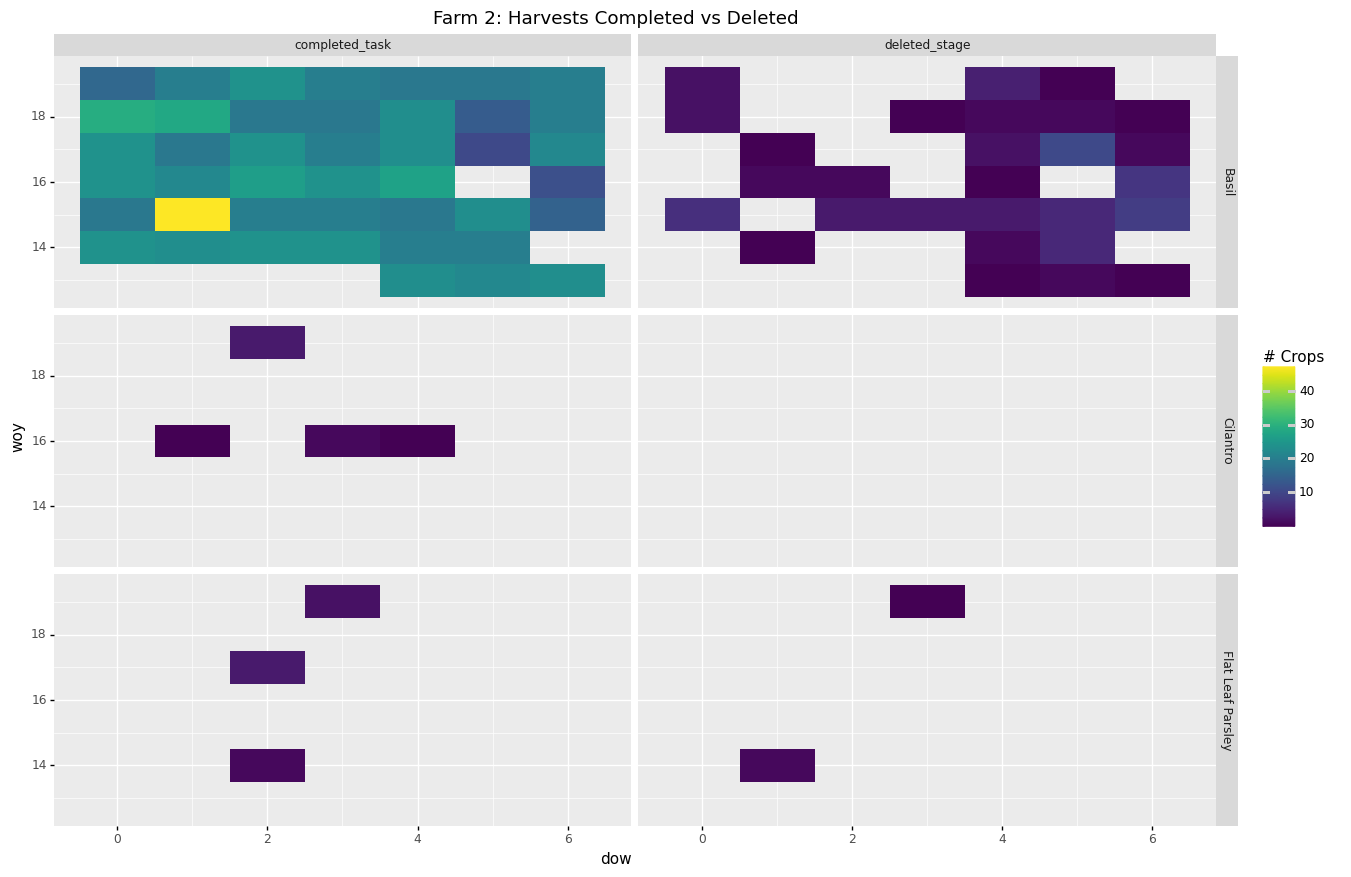

<ggplot: (361723025)>

In [23]:
farm_id = 2
(
    harvests
    .query(f"FARM_ID == {farm_id}")
    .groupby(['STAGE_COMPLETE_OR_SCHEDULED_DATE','COMPONENT_NAME','TASK_SOURCE'])['CROP_ID'].nunique()
    .reset_index()
    .assign(STAGE_COMPLETE_OR_SCHEDULED_DATE=lambda x: pd.to_datetime(x['STAGE_COMPLETE_OR_SCHEDULED_DATE']))
    .assign(dow=lambda x: x['STAGE_COMPLETE_OR_SCHEDULED_DATE'].apply(lambda y: y.dayofweek))
    .assign(woy=lambda x: x['STAGE_COMPLETE_OR_SCHEDULED_DATE'].apply(lambda y: y.weekofyear))
    
    .pipe(lambda x: ggplot(x, aes(x='dow',y='woy',fill='CROP_ID')) 
          + geom_tile()
          + facet_grid(['COMPONENT_NAME','TASK_SOURCE'])
          + theme(figure_size=(15,10)))
          + ggtitle(f"Farm {farm_id}: Harvests Completed vs Deleted")
          + labs(fill="# Crops")
)

In [24]:
(
    harvests
    .fillna({'SALABLE_MASS_G':0})
    .query('SALABLE_MASS_G.isnull()')
).shape

(0, 45)

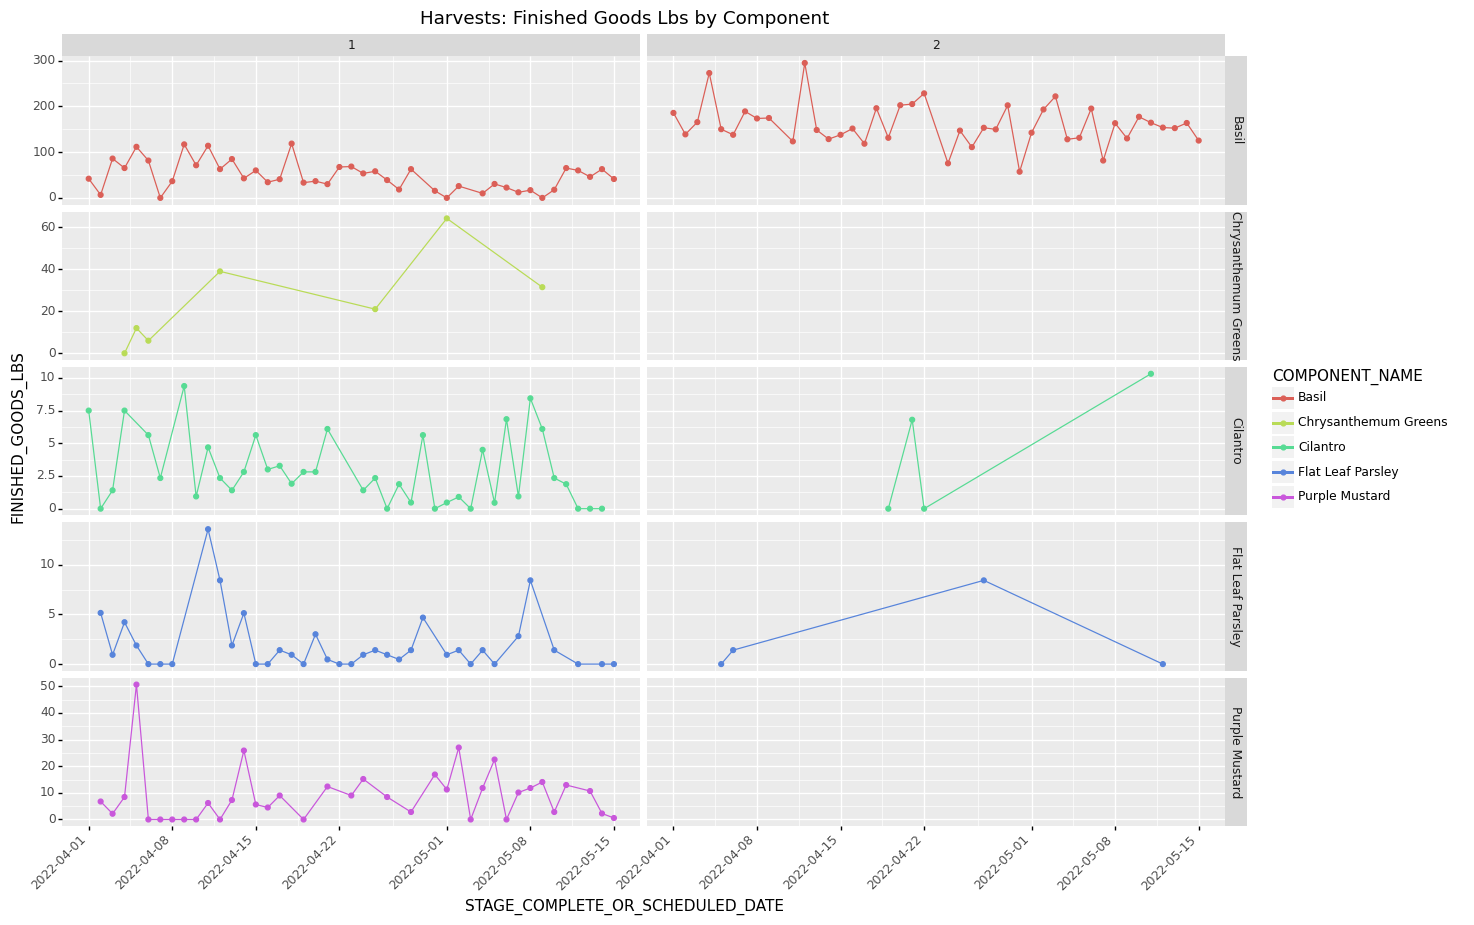

<ggplot: (360393027)>

In [28]:
harvest_mass = (
    harvests
#     .query(f'FARM_ID == {farm_id}')
    .fillna({'SALABLE_MASS_G':0})
    .fillna({'FINISHED_GOODS_LBS':0})
    .assign(SALABLE_MASS_LBS = lambda x: x['SALABLE_MASS_G'].astype(float)/453.592)
    .groupby(['FARM_ID','STAGE_COMPLETE_OR_SCHEDULED_DATE','COMPONENT_NAME'])
    .agg(#SALABLE_MASS_LBS = pd.NamedAgg('SALABLE_MASS_LBS','sum'),
         FINISHED_GOODS_LBS = pd.NamedAgg('FINISHED_GOODS_LBS','sum'))
    
    .reset_index()
    .assign(variable = 'harvest_finished_goods_lbs')
    .rename(columns={'FINISHED_GOODS_LBS':'value'})
    .assign(STAGE_COMPLETE_OR_SCHEDULED_DATE = lambda x: pd.to_datetime(x['STAGE_COMPLETE_OR_SCHEDULED_DATE']))

)

(
    harvest_mass
    .pipe(lambda x: ggplot(x, aes(x='STAGE_COMPLETE_OR_SCHEDULED_DATE',color='COMPONENT_NAME')) 
          + geom_point(mapping=aes(y='value'))
          + geom_line(mapping=aes(y='value'))
          + facet_grid(['COMPONENT_NAME','FARM_ID'],scales='free')
          + theme(axis_text_x=element_text(rotation=45,hjust=1),
                 figure_size=(15,10))
          + labs(y='FINISHED_GOODS_LBS')
          + ggtitle(f"Harvests: Finished Goods Lbs by Component")
         )
)

### Raw Goods Inventory

In [209]:
qry = """
    with source as (
        select *, 
          hour_starting_at_local::date as bin_inventory_day,
          extract('hour',hour_starting_at_local) as hr
        from report.f_hourly_bin_inventory_by_component_and_age
        where farm_id in (1,2)
            and component_id in (15,16,17,28,48) 
            and hr = 5
            and bin_inventory_day between '2022-04-01' and '2022-05-15'
    )
    select sum(starting_inventory_lbs) as starting_inventory_lbs,
      farm_id, 
      component_id,
      component_name,
      bin_inventory_day
    from source
    group by farm_id, component_id, component_name, bin_inventory_day
"""
bin_inventory_qry = pd.read_sql(qry,conn)

In [210]:
bin_inventory = (
    bin_inventory_qry
    .assign(BIN_INVENTORY_DAY = lambda x: pd.to_datetime(x['BIN_INVENTORY_DAY']))
    .assign(value = lambda x: x['STARTING_INVENTORY_LBS'].astype(float))
    .assign(variable = 'bin_inventory_lbs_5am')
    .drop(['STARTING_INVENTORY_LBS','COMPONENT_ID'],axis=1)
)

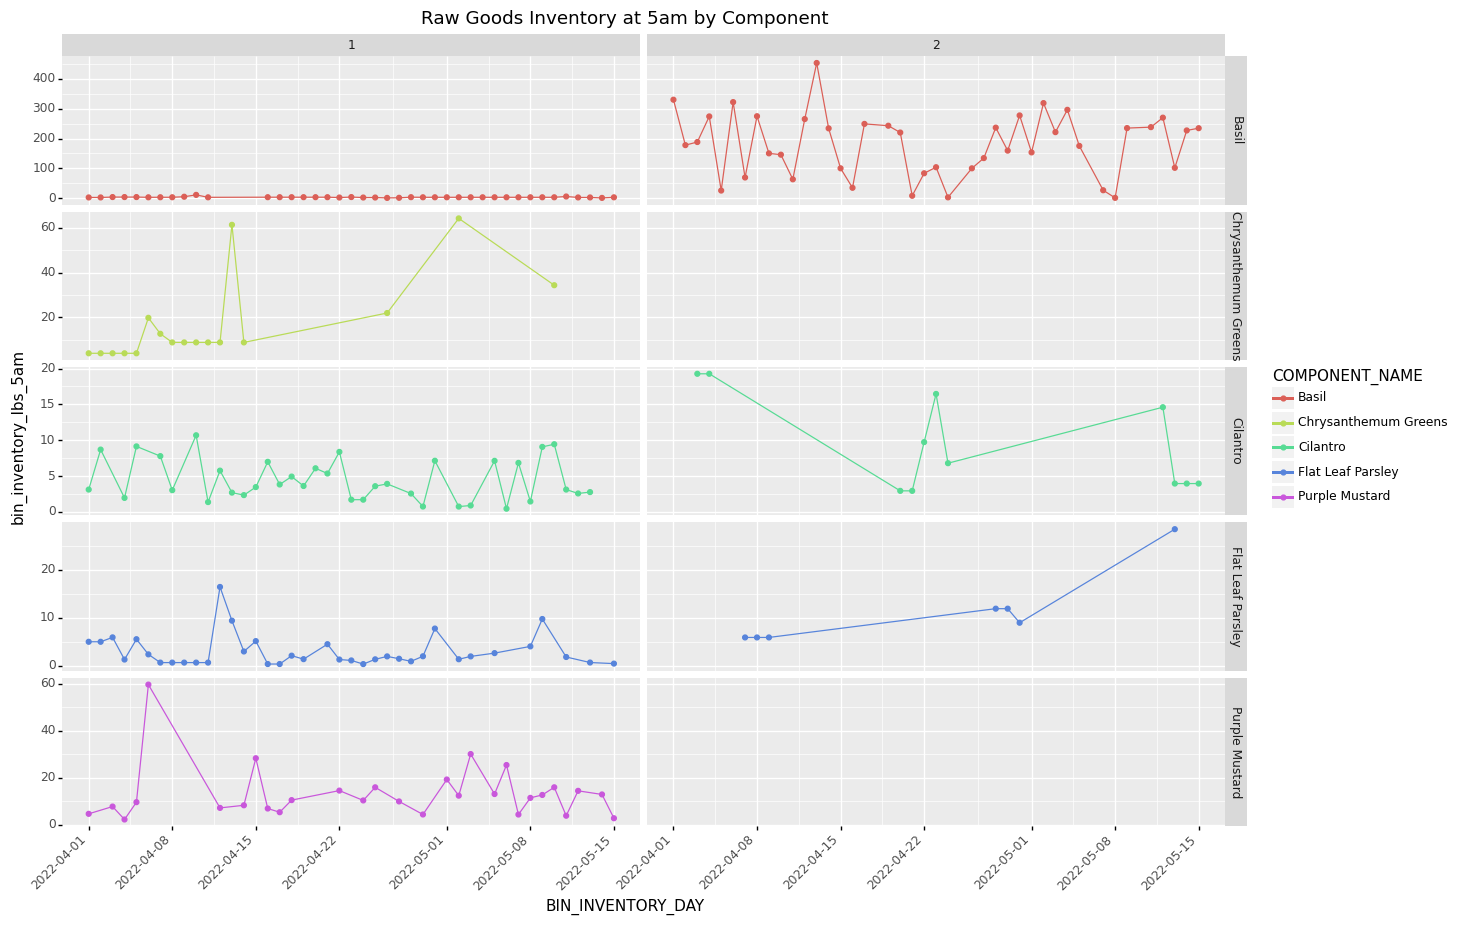

<ggplot: (360503543)>

In [31]:
(
    bin_inventory

    .pipe(lambda x: ggplot(x, aes(x='BIN_INVENTORY_DAY',y='value',color='COMPONENT_NAME')) 
         + geom_point()
         + geom_line()
         + facet_grid(['COMPONENT_NAME','FARM_ID'],scales='free')
         + theme(axis_text_x=element_text(hjust=1,rotation=45),
                 figure_size=(15,10)))
         + ggtitle("Raw Goods Inventory at 5am by Component")
         + labs(y='bin_inventory_lbs_5am')
)

## Combined Estimates

In [35]:
line_items_daily.head()

,FARM_ID,DELIVERY_SCHEDULED_ON,COMPONENT_NAME,variable,value
0,1,2022-04-01,Basil,weight_ordered_lbs,31.87500
1,1,2022-04-01,Purple Mustard,weight_ordered_lbs,14.62500
2,1,2022-04-02,Basil,weight_ordered_lbs,5.62500
3,1,2022-04-04,Basil,weight_ordered_lbs,12.65625
4,1,2022-04-04,Purple Mustard,weight_ordered_lbs,7.31250


In [36]:
transship_items_daily.head()

,FARM_ID,DELIVERY_SCHEDULED_ON,COMPONENT_NAME,variable,value
0,1,2022-04-01,Cilantro,weight_ordered_lbs,3.28125
1,1,2022-04-01,Flat Leaf Parsley,weight_ordered_lbs,10.31250
2,1,2022-04-03,Cilantro,weight_ordered_lbs,8.90625
3,1,2022-04-03,Flat Leaf Parsley,weight_ordered_lbs,3.28125
4,1,2022-04-04,Cilantro,weight_ordered_lbs,0.93750


In [37]:
harvest_mass.head()

,FARM_ID,STAGE_COMPLETE_OR_SCHEDULED_DATE,COMPONENT_NAME,value,variable
0,1,2022-04-01,Basil,41.928953,harvest_finished_goods_lbs
1,1,2022-04-01,Cilantro,7.500000,harvest_finished_goods_lbs
2,1,2022-04-02,Basil,6.562500,harvest_finished_goods_lbs
3,1,2022-04-02,Cilantro,0.000000,harvest_finished_goods_lbs
4,1,2022-04-02,Flat Leaf Parsley,5.156250,harvest_finished_goods_lbs


In [38]:
bin_inventory.head()

,FARM_ID,COMPONENT_NAME,BIN_INVENTORY_DAY,value,variable
0,1,Cilantro,2022-04-02,8.699448,bin_inventory_lbs_5am
1,1,Basil,2022-04-03,3.840456,bin_inventory_lbs_5am
2,1,Flat Leaf Parsley,2022-04-03,5.912803,bin_inventory_lbs_5am
3,1,Purple Mustard,2022-04-03,7.680911,bin_inventory_lbs_5am
4,2,Basil,2022-04-03,188.358701,bin_inventory_lbs_5am


In [39]:
transship_items_daily.query("COMPONENT_NAME=='Basil'")

,FARM_ID,DELIVERY_SCHEDULED_ON,COMPONENT_NAME,variable,value
12,1,2022-04-08,Basil,weight_ordered_lbs,84.3750
15,1,2022-04-10,Basil,weight_ordered_lbs,70.3125
18,1,2022-04-12,Basil,weight_ordered_lbs,70.3125
29,1,2022-04-18,Basil,weight_ordered_lbs,75.0000
35,1,2022-04-21,Basil,weight_ordered_lbs,84.3750
42,1,2022-04-25,Basil,weight_ordered_lbs,70.3125
48,1,2022-04-28,Basil,weight_ordered_lbs,46.8750
49,1,2022-04-29,Basil,weight_ordered_lbs,0.0000
74,1,2022-05-12,Basil,weight_ordered_lbs,56.2500
80,2,2022-04-22,Basil,weight_ordered_lbs,0.0000


In [63]:
farm_id = 2
component_name = 'Basil'
harvest_delivery_timedelta = 2
bin_delivery_timedelta = 1


li_instance = (
    line_items_daily
    .query(f"FARM_ID == {farm_id}")
    .query(f"COMPONENT_NAME == '{component_name}'")
    .query("variable.isin(['weight_ordered_lbs','weight_to_allocate_lbs'])")
)

hm_instance = (
    harvest_mass
    .query(f"FARM_ID == {farm_id}")
    .query(f"COMPONENT_NAME == '{component_name}'")
    .assign(DELIVERY_SCHEDULED_ON = lambda x: x['STAGE_COMPLETE_OR_SCHEDULED_DATE'] + pd.Timedelta(days=harvest_delivery_timedelta))
    [['FARM_ID','DELIVERY_SCHEDULED_ON','COMPONENT_NAME','variable','value']]
)

shortfall_instance = (
    line_items_daily.pivot(index=['FARM_ID','DELIVERY_SCHEDULED_ON','COMPONENT_NAME'],columns='variable')
    .fillna(0)
    .droplevel(0,axis=1)
    .assign(ordered_to_allocate_shortfall = lambda x: x['weight_ordered_lbs'] - x['weight_to_allocate_lbs'])
    .query("ordered_to_allocate_shortfall > 0")
    .query(f"FARM_ID == {farm_id}")
    .query(f"COMPONENT_NAME == '{component_name}'")
    
    [['ordered_to_allocate_shortfall']]
    .reset_index()
    .pipe(lambda x: pd.melt(x,id_vars=['FARM_ID','DELIVERY_SCHEDULED_ON','COMPONENT_NAME']))
)

bin_instance = (
    bin_inventory
    .query(f'FARM_ID == {farm_id}')
    .query(f'COMPONENT_NAME == "{component_name}"')
    .assign(DELIVERY_SCHEDULED_ON = lambda x: x['BIN_INVENTORY_DAY'] + pd.Timedelta(days=bin_delivery_timedelta))
    [['FARM_ID','DELIVERY_SCHEDULED_ON','COMPONENT_NAME','variable','value']]
)
bin_instance

all_instance = (
    pd.concat(
        [
            li_instance,
            hm_instance,
            shortfall_instance,
            bin_instance
        ],
        axis=0)
    .pivot(index=['FARM_ID','DELIVERY_SCHEDULED_ON','COMPONENT_NAME'],columns='variable')
    .droplevel(0,axis=1)
)
all_instance

variable                                      bin_inventory_lbs_5am  \
FARM_ID DELIVERY_SCHEDULED_ON COMPONENT_NAME                          
2       2022-04-01            Basil                             NaN   
        2022-04-02            Basil                      330.239510   
        2022-04-03            Basil                      177.926418   
        2022-04-04            Basil                      188.358701   
        2022-04-05            Basil                      274.178116   
        2022-04-06            Basil                       25.644191   
        2022-04-07            Basil                      322.210268   
        2022-04-08            Basil                       69.445669   
        2022-04-09            Basil                      274.863754   
        2022-04-10            Basil                      150.364204   
        2022-04-11            Basil                      145.952750   
        2022-04-12            Basil                       63.387361   
        2022-04-13            Basil                      265.357414   
        2022-04-14            Basil                      453.313404   
        2022-04-15            Basil                      234.181820   
        2022-04-16            Basil                      100.226635   
        2022-04-17            Basil                       34.958729   
        2022-04-18            Basil                      249.153424   
        2022-04-19            Basil                             NaN   
        2022-04-20            Basil                      243.024568   
        2022-04-21            Basil                      220.219933   
        2022-04-22            Basil                        8.187975   
        2022-04-23            Basil                       83.566289   
        2022-04-24            Basil                      103.914972   
        2022-04-25            Basil                        2.859398   
        2022-04-26            Basil                             NaN   
        2022-04-27            Basil                      100.213408   
        2022-04-28            Basil                      134.484294   
        2022-04-29            Basil                      236.593679   
        2022-04-30            Basil                      159.539851   
        2022-05-01            Basil                      277.515917   
        2022-05-02            Basil                      153.596183   
        2022-05-03            Basil                      318.830579   
        2022-05-04            Basil                      221.425863   
        2022-05-05            Basil                      296.365456   
        2022-05-06            Basil                      175.384486   
        2022-05-07            Basil                             NaN   
        2022-05-08            Basil                       26.704616   
        2022-05-09            Basil                        1.179474   
        2022-05-10            Basil                      235.054851   
        2022-05-11            Basil                             NaN   
        2022-05-12            Basil                      238.229510   
        2022-05-13            Basil                      270.064287   
        2022-05-14            Basil                      101.895536   
        2022-05-15            Basil                      227.188751   
        2022-05-16            Basil                      234.719748   
        2022-05-17            Basil                             NaN   

variable                                      harvest_finished_goods_lbs  \
FARM_ID DELIVERY_SCHEDULED_ON COMPONENT_NAME                               
2       2022-04-01            Basil                                  NaN   
        2022-04-02            Basil                                  NaN   
        2022-04-03            Basil                           185.625000   
        2022-04-04            Basil                           138.750000   
        2022-04-05            Basil                           16

In [64]:
all_instance.fillna(0)[['harvest_finished_goods_lbs','weight_to_allocate_lbs']].assign(harvest = lambda x: x['harvest_finished_goods_lbs'].cumsum(), alloc = lambda x: x['weight_to_allocate_lbs'].cumsum())

variable                                      harvest_finished_goods_lbs  \
FARM_ID DELIVERY_SCHEDULED_ON COMPONENT_NAME                               
2       2022-04-01            Basil                             0.000000   
        2022-04-02            Basil                             0.000000   
        2022-04-03            Basil                           185.625000   
        2022-04-04            Basil                           138.750000   
        2022-04-05            Basil                           165.468750   
        2022-04-06            Basil                           272.625000   
        2022-04-07            Basil                           150.000000   
        2022-04-08            Basil                           137.812500   
        2022-04-09            Basil                           188.906250   
        2022-04-10            Basil                           173.437500   
        2022-04-11            Basil                           174.488566   
        2022-04-12            Basil                             0.000000   
        2022-04-13            Basil                           123.392444   
        2022-04-14            Basil                           294.625505   
        2022-04-15            Basil                           148.318970   
        2022-04-16            Basil                           128.350582   
        2022-04-17            Basil                           137.812500   
        2022-04-18            Basil                           151.406250   
        2022-04-19            Basil                           118.312500   
        2022-04-20            Basil                           195.843750   
        2022-04-21            Basil                           131.250000   
        2022-04-22            Basil                           202.411632   
        2022-04-23            Basil                           204.897918   
        2022-04-24            Basil                           228.281250   
        2022-04-25            Basil                             0.000000   
        2022-04-26            Basil                            75.468750   
        2022-04-27            Basil                           146.986342   
        2022-04-28            Basil                           110.826158   
        2022-04-29            Basil                           153.160499   
        2022-04-30            Basil                           149.652001   
        2022-05-01            Basil                           202.136333   
        2022-05-02            Basil                            57.187500   
        2022-05-03            Basil                           142.416387   
        2022-05-04            Basil                           193.125000   
        2022-05-05            Basil                           221.718750   
        2022-05-06            Basil                           127.968750   
        2022-05-07            Basil                           131.250000   
        2022-05-08            Basil                           195.093750   
        2022-05-09            Basil                            81.562500   
        2022-05-10            Basil                           163.125000   
        2022-05-11            Basil                           129.843750   
        2022-05-12            Basil                           177.187500   
        2022-05-13            Basil                           164.235116   
        2022-05-14            Basil                           153.577384   
        2022-05-15            Basil                           152.343750   
        2022-05-16            Basil                           163.593750   
        2022-05-17            Basil                           125.156250   

variable                                      weight_to_allocate_lbs  \
FARM_ID DELIVERY_SCHEDULED_ON COMPONENT_NAME                           
2       2022-04-01            Basil                        229.21875   
        2022-04-02            Basil                        

/Users/pmccarthy/git/inflight_fulfillment/venv/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 13 rows containing missing values.


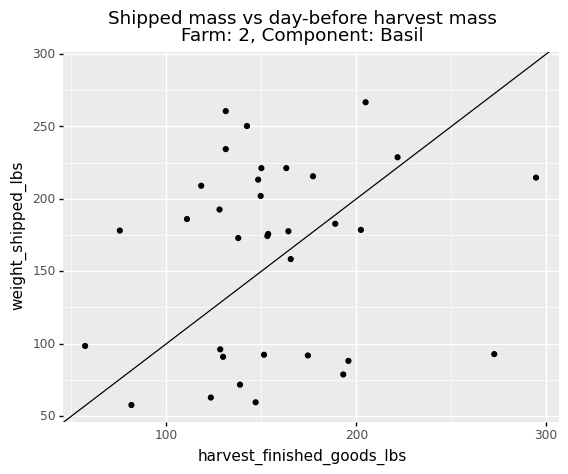

<ggplot: (360982682)>

In [41]:
(
    ggplot(all_instance, aes(x='harvest_finished_goods_lbs',y='weight_shipped_lbs')) 
    + geom_point() 
    + geom_abline(intercept=0,slope=1)
    + ggtitle(f"Shipped mass vs day-before harvest mass\nFarm: {farm_id}, Component: {component_name}")
)

## Harvest vs Delivery

### Overall

In [212]:
qry="""
    with to_dates as (
      select delivered_at_local::date as delivered_at,
        harvest_task_completed_at_local::date as harvested_at,
        salable_mass_lbs
      from warehouse.br_salable_mass_outcomes b
      where component_id = 15
        and farm_id = 2
        and delivery_scheduled_on between '2022-04-01' and '2022-05-15'
    )
    select delivered_at, harvested_at, sum(salable_mass_lbs) as sum_salable_mass_lbs
    from to_dates
    group by delivered_at, harvested_at
"""

df = pd.read_sql(qry,conn)

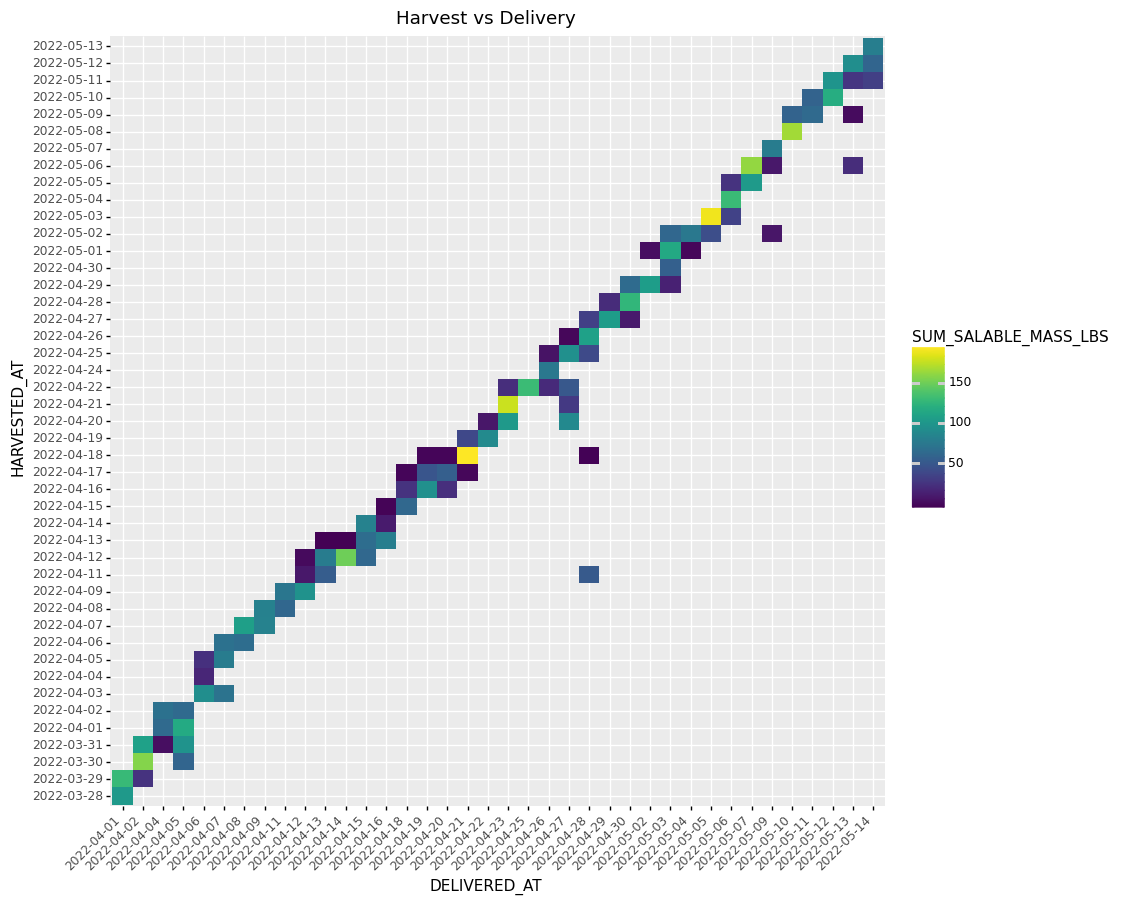

<ggplot: (400520650)>

In [213]:
(
    df

    .pipe(lambda x: ggplot(x, aes(x='DELIVERED_AT',y='HARVESTED_AT',fill='SUM_SALABLE_MASS_LBS'))
         + geom_tile()
         + theme(axis_text_x = element_text(hjust=1,rotation=45),
                 figure_size=(10,10))
         + ggtitle("Harvest vs Delivery"))
)

### Shortfall

In [215]:
qry="""
    with to_dates as (
      select 
      --delivered_at_local::date as delivered_at,
        delivery_scheduled_on,
        harvest_task_completed_at_local::date as harvested_at,
        salable_mass_lbs
        
      from warehouse.br_salable_mass_outcomes b

      where component_id = 15
        and farm_id = 2
        and delivery_scheduled_on between '2022-04-01' and '2022-05-15'
    ),
    salable_mass_agg as (
      select delivery_scheduled_on, 
        harvested_at, 
        sum(salable_mass_lbs) as sum_salable_mass_lbs
      from to_dates
      group by delivery_scheduled_on, harvested_at
    ),
    line_item_shorts_per_day as (
      select weight_to_allocate_lbs,
        weight_ordered_lbs,
        nvl(weight_ordered_lbs - weight_to_allocate_lbs,0) as weight_shortfall_lbs,
        delivery_scheduled_on,
        line_item_id
      from warehouse.dm_line_items
      where delivery_scheduled_on between '2022-04-01' and '2022-05-15'
        and sku_id in (26,243,338)
    ),
    line_item_shorts_agg as (
        select delivery_scheduled_on,
          sum(weight_shortfall_lbs) as sum_weight_shortfall_lbs
        from line_item_shorts_per_day
        group by delivery_scheduled_on
    ),
    mass_and_shorts as (
        select delivery_scheduled_on,
          harvested_at,
          sum_salable_mass_lbs,
          sum_weight_shortfall_lbs
        from salable_mass_agg
        left join line_item_shorts_agg using (delivery_scheduled_on)
    )
    select *
    from mass_and_shorts
"""
df = pd.read_sql(qry,conn)
df

,DELIVERY_SCHEDULED_ON,HARVESTED_AT,SUM_SALABLE_MASS_LBS,SUM_WEIGHT_SHORTFALL_LBS
0,2022-05-03,2022-04-29,17.81250,0.0
1,2022-05-03,2022-04-30,57.18750,0.0
2,2022-05-03,2022-05-01,113.90625,0.0
3,2022-05-03,2022-05-02,62.34375,0.0
4,2022-04-30,2022-04-29,65.15625,0.0
...,...,...,...,...
98,2022-05-10,2022-05-08,162.18750,0.0
99,2022-04-01,2022-03-29,127.03125,0.0
100,2022-04-01,2022-03-28,101.25000,0.0
101,2022-04-09,2022-04-07,82.96875,0.0


In [216]:
shortfall_df =(
    df    
    .assign(delivery_day_of_year = lambda x: pd.to_datetime(x['DELIVERY_SCHEDULED_ON']).apply(lambda y: y.dayofyear))
    .assign(harvest_day_of_year = lambda x: pd.to_datetime(x['HARVESTED_AT']).apply(lambda y: y.dayofyear))
    .query('SUM_WEIGHT_SHORTFALL_LBS> 0')
#     .assign(min_shortfall_harvest = lambda x: x.groupby('SUM_WEIGHT_SHORTFALL_LBS')['harvest_day_of_year'].transform('min'))
#     .assign(max_shortfall_harvest = lambda x: x.groupby('SUM_WEIGHT_SHORTFALL_LBS')['harvest_day_of_year'].transform('max'))
    
#     .pipe(lambda x: ggplot(x, aes())
#          + geom_rect(mapping=aes(xmin='delivery_day_of_year',xmax='delivery_day_of_year+1',ymin='min_shortfall_harvest', ymax='max_shortfall_harvest')))
)

In [217]:
shortfall_df

,DELIVERY_SCHEDULED_ON,HARVESTED_AT,SUM_SALABLE_MASS_LBS,SUM_WEIGHT_SHORTFALL_LBS,delivery_day_of_year,harvest_day_of_year
24,2022-04-29,2022-04-28,23.692612,40.31250,119,118
25,2022-04-29,2022-04-27,103.338638,40.31250,119,117
29,2022-04-16,2022-04-14,13.587975,7.50000,106,104
30,2022-04-16,2022-04-13,80.162025,7.50000,106,103
31,2022-04-16,2022-04-15,2.343750,7.50000,106,105
76,2022-04-26,2022-04-24,75.468750,243.65625,116,114
77,2022-04-26,2022-04-22,22.968750,243.65625,116,112
78,2022-04-26,2022-04-25,9.375000,243.65625,116,115
89,2022-05-06,2022-05-04,127.500000,2.81250,126,124
90,2022-05-06,2022-05-03,37.031250,2.81250,126,123


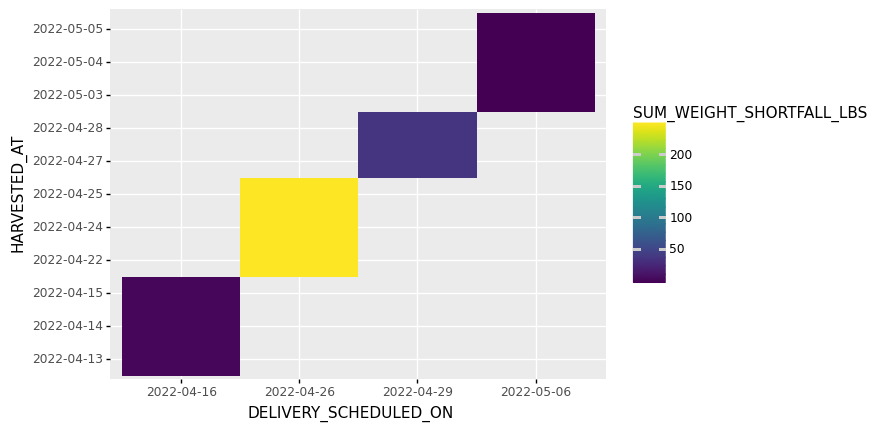

<ggplot: (391169479)>

In [218]:
ggplot(shortfall_df, aes(x='DELIVERY_SCHEDULED_ON',y='HARVESTED_AT',fill='SUM_WEIGHT_SHORTFALL_LBS')) + geom_tile()

## Predictions

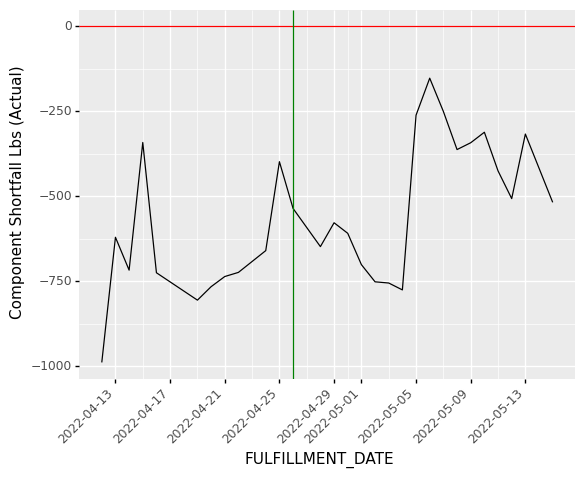

<ggplot: (398024957)>

In [245]:
qry = """
    select *
    from report.f_daily_inflight_supply_demand_expectation
    where farm_id = 2
    and component_id = 15
    and fulfillment_date between '2022-04-01' and '2022-05-15'
    and prediction_days_ahead = 5
    order by fulfillment_date
"""
df = pd.read_sql(qry,conn)

(
    df
    .assign(FULFILLMENT_DATE = lambda x: pd.to_datetime(x['FULFILLMENT_DATE']))
    .pipe(lambda x: ggplot(x, aes(x='FULFILLMENT_DATE',y='Component Shortfall Lbs (Actual)')) 
          + geom_line()
          + geom_hline(yintercept=0,color='red')
          + geom_vline(xintercept=datetime.date(2022,4,26),color='green')
          + theme(axis_text_x=element_text(hjust=1,rotation=45)))
)

In [241]:
(
    df
    .query('FULFILLMENT_DATE >= datetime.date(2022,4,24)')
    .query('FULFILLMENT_DATE <= datetime.date(2022,4,28)')
    .query("PREDICTION_DAYS_AHEAD < 7")
    .sort_values(['FULFILLMENT_DATE','PREDICTION_DAYS_AHEAD'])
    [['FULFILLMENT_DATE',
      'Component Shortfall Lbs (Actual)',
      'PREDICTION_DAYS_AHEAD',
      'Prediction q10',
      'Prediction q90']]
)

,FULFILLMENT_DATE,Component Shortfall Lbs (Actual),PREDICTION_DAYS_AHEAD,Prediction q10,Prediction q90
120,2022-04-24,-659.521648,0.0,-974.86,941.15
121,2022-04-24,-659.521648,1.0,-428.23,256.28
126,2022-04-24,-659.521648,3.0,-550.27,-71.96
134,2022-04-24,-659.521648,4.0,-415.36,73.49
128,2022-04-24,-659.521648,5.0,-666.22,74.96
129,2022-04-24,-659.521648,6.0,-1131.70,547.79
136,2022-04-25,-397.891893,0.0,-1527.09,1438.42
137,2022-04-25,-397.891893,1.0,-1755.59,1565.49
138,2022-04-25,-397.891893,2.0,-544.24,154.06
135,2022-04-25,-397.891893,4.0,-617.74,67.56


## Other Queries

In [ ]:
pd.read_sql("select 1",conn)

In [ ]:
qry = """

    with packing_bins as (
        select task_id, 
          s.value as bin_id,
          started_at_local,
          completed_at_local
        from warehouse.dm_tasks_packing,
        lateral flatten(input=>source_bin_ids) s
        where started_at_local > '2022-03-01'
    ),
    
    bins_subset as (
        select *
        from warehouse.scd_bins
        where valid_from > '2022-03-01'
        and valid_to < '2022-06-01'
    )

    select c.case_id, 
      c.packing_task_id, 
      c.line_item_id,
      
      l.delivery_scheduled_on,
      
      t.started_at_local as packing_started_local,
      t.completed_at_local as packing_completed_local,
      t.bin_id,
      
      b.crop_id
      
    from warehouse.dm_cases c
    inner join warehouse.dm_line_items l using (line_item_id)
    
    inner join packing_bins t on c.packing_task_id = t.task_id
    
    inner join bins_subset b on b.bin_id = t.bin_id
    
    where c.farm_id =2
      and c.sku_id in (243,338)
      and l.delivery_scheduled_on between '2022-04-01' and '2022-05-15'
"""
df = pd.read_sql(qry,conn)
df

In [52]:
qry = """
    with valid_crops as (
        select *,
          finished_goods_lbs as crop_finished_goods_lbs
        from warehouse.dm_crops
        where farm_id = 2
          and component_id = 15
          and completed_at_local between '2022-03-15' and '2022-06-01'
    ),
    
    valid_bins as (
        select bin_id, 
          crop_id, 
          task_id, 
          cleared_at_local::date as bin_cleared_at_local_date
        from warehouse.scd_bins
        where cleared_at > '2022-03-01'
    ),
    
    crop_bins as (    
        select distinct bin_id, 
          crop_id, 
          crop_finished_goods_lbs, 
          completed_at as crop_completed_at,
          task_id as packing_task_id,
          bin_cleared_at_local_date
        from valid_bins b
        inner join
        valid_crops c using (crop_id)
    ),
    
    crops as (
        select crop_id, 
          completed_at_local::date as crop_completed_at_local
        from warehouse.dm_crops
        where completed_at_local > '2022-03-01'
    ),
    
    harvests as (
        select crop_id, 
          completed_at::date as harvest_completed_at
        from warehouse.f_harvests
        where component_id = 15
          and farm_id = 2
          and completed_at > '2022-03-01'
    ),
    
    --packing_bins as (
    --    select task_id::int as packing_task_id, 
    --      sku_id,
    --      s.value as bin_id,
    --      started_at_local as packing_started_at_local,
    --      completed_at_local as packing_completed_at_local
    --    from warehouse.dm_tasks_packing,
    --    lateral flatten(input=>source_bin_ids) s
    --    where started_at_local > '2022-03-01'
    --),
    
    packing_bins as (
        select task_id::int as packing_task_id,
          sku_id,
          source_bin_ids,
          started_at_local as packing_started_at_local,
          completed_at_local as packing_completed_at_local
        from warehouse.dm_tasks_packing
        where started_at_local > '2022-03-01'        
    ),
    
    cases as (
        select case_id,
          line_item_id,
          sku_id,
          packing_task_id::int as packing_task_id
        from warehouse.dm_cases
        where created_at > '2022-03-01'
    ),
    
    line_items as (
        select line_item_id,
          delivery_scheduled_on,
          sku_id
        from warehouse.dm_line_items
        where delivery_scheduled_on >= '2022-04-01'
          and farm_id = 2
          and sku_id in (26,243,338)
    ),
    
    case_line_items as (
        select line_item_id,
          sku_id,
          case_id, 
          packing_task_id,
          delivery_scheduled_on,
          pb.source_bin_ids,
          len(pb.source_bin_ids) as num_bins_per_packing_task,
          packing_started_at_local,
          packing_completed_at_local
        from cases c
        inner join line_items l using (sku_id, line_item_id)
        left join packing_bins pb using (sku_id, packing_task_id)
    ),
    
    cases_per_packing_task as (
        select count(distinct case_id) as n_case_id, 
          sku_id,
          packing_task_id, 
          source_bin_ids, 
          len(source_bin_ids) as n_bins,
          delivery_scheduled_on,
          packing_completed_at_local
        from case_line_items
        group by packing_task_id, 
          sku_id,
          source_bin_ids, 
          delivery_scheduled_on,
          packing_completed_at_local
    ),
    
    per_bin as (
    
        select c.*, 
          s.value as bin_id
        from cases_per_packing_task c,
        lateral flatten(input=>source_bin_ids) s
    ),
    
    crop_bin_data as (
        select *
        from per_bin p
        inner join 
        crop_bins c using (bin_id, packing_task_id)
    ),
    
    total_
    
    
    
    select *,
      sum(n_case_id) over (partition by crop_id) as total_case_per_crop
    from crop_bin_data
    

"""
df = pd.read_sql(qry,conn)

df.sort_values(['CROP_ID','DELIVERY_SCHEDULED_ON'])

,BIN_ID,PACKING_TASK_ID,N_CASE_ID,SKU_ID,SOURCE_BIN_IDS,N_BINS,DELIVERY_SCHEDULED_ON,PACKING_COMPLETED_AT_LOCAL,CROP_ID,CROP_FINISHED_GOODS_LBS,CROP_COMPLETED_AT,BIN_CLEARED_AT_LOCAL_DATE,TOTAL_CASE_PER_CROP
6210,4463,525996,216,243,"[\n 4463,\n 4462,\n 4461,\n 4460,\n 4459,...",676,2022-04-01,2022-03-29 06:07:18.159897,185917,10.991459,2022-03-28 13:17:33.548907,2022-03-29,1512
6224,4448,525996,216,243,"[\n 4463,\n 4462,\n 4461,\n 4460,\n 4459,...",676,2022-04-01,2022-03-29 06:07:18.159897,185917,10.991459,2022-03-28 13:17:33.548907,2022-03-29,1512
6241,4424,525996,216,243,"[\n 4463,\n 4462,\n 4461,\n 4460,\n 4459,...",676,2022-04-01,2022-03-29 06:07:18.159897,185917,10.991459,2022-03-28 13:17:33.548907,2022-03-29,1512
6244,4419,525996,216,243,"[\n 4463,\n 4462,\n 4461,\n 4460,\n 4459,...",676,2022-04-01,2022-03-29 06:07:18.159897,185917,10.991459,2022-03-28 13:17:33.548907,2022-03-29,1512
6269,4381,525996,216,243,"[\n 4463,\n 4462,\n 4461,\n 4460,\n 4459,...",676,2022-04-01,2022-03-29 06:07:18.159897,185917,10.991459,2022-03-28 13:17:33.548907,2022-03-29,1512
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10390,4456,558148,108,243,"[\n 4463,\n 4462,\n 4461,\n 4460,\n 4458,...",596,2022-05-18,2022-05-15 22:53:45.106419,198237,5.892146,2022-05-15 19:29:35.391676,2022-05-15,930
10393,4452,558148,108,243,"[\n 4463,\n 4462,\n 4461,\n 4460,\n 4458,...",596,2022-05-18,2022-05-15 22:53:45.106419,198237,5.892146,2022-05-15 19:29:35.391676,2022-05-15,930
10402,4439,558148,108,243,"[\n 4463,\n 4462,\n 4461,\n 4460,\n 4458,...",596,2022-05-18,2022-05-15 22:53:45.106419,198237,5.892146,2022-05-15 19:29:35.391676,2022-05-15,930
10427,4401,558148,108,243,"[\n 4463,\n 4462,\n 4461,\n 4460,\n 4458,...",596,2022-05-18,2022-05-15 22:53:45.106419,198237,5.892146,2022-05-15 19:29:35.391676,2022-05-15,930


In [81]:
qry = """
    with valid_crops as (
        select *,
          finished_goods_lbs as crop_finished_goods_lbs
        from warehouse.dm_crops
        where farm_id = 2
          and component_id = 15
          and completed_at_local between '2022-03-15' and '2022-06-01'
    ),
    
    valid_bins as (
        select bin_id, 
          crop_id, 
          task_id, 
          cleared_at_local::date as bin_cleared_at_local_date
        from warehouse.scd_bins
        where cleared_at > '2022-03-01'
    ),
    
    crop_bins as (    
        select distinct bin_id, 
          crop_id, 
          crop_finished_goods_lbs, 
          completed_at as crop_completed_at,
          task_id as packing_task_id,
          bin_cleared_at_local_date
        from valid_bins b
        inner join
        valid_crops c using (crop_id)
    ),
    
    crop_bin_fraction as (
      select count(distinct bin_id) as n_bin_id, 
        1/n_bin_id as fraction_of_crop_per_bin, 
        crop_id, 
        crop_finished_goods_lbs,
        crop_completed_at,
        packing_task_id
      from crop_bins
      group by crop_id,
        crop_finished_goods_lbs, 
        crop_completed_at,
        packing_task_id
      order by n_bin_id
    ),
    
    packing_bins as (
        select task_id::int as packing_task_id,
          sku_id,
          source_bin_ids,
          
          started_at_local as packing_started_at_local,
          completed_at_local as packing_completed_at_local
        from warehouse.dm_tasks_packing
        where started_at_local > '2022-03-01'        
    ),
    
    cases as (
        select case_id,
          line_item_id,
          sku_id,
          packing_task_id::int as packing_task_id
        from warehouse.dm_cases
        where created_at > '2022-03-01'
        and sku_id in (26,243,338)
    ),
    
    cases_array as (
        select line_item_id,
          packing_task_id,
          array_agg(case_id) as cases,
          count(distinct case_id) as n_cases
        from cases
        group by line_item_id,
          packing_task_id
    )
    
    select *
    from crop_bin_fraction
    left join packing_bins using (packing_task_id)
    left join cases_array using (packing_task_id)
    order by crop_id
"""
df = pd.read_sql(qry,conn)
df

,PACKING_TASK_ID,N_BIN_ID,FRACTION_OF_CROP_PER_BIN,CROP_ID,CROP_FINISHED_GOODS_LBS,CROP_COMPLETED_AT,SKU_ID,SOURCE_BIN_IDS,PACKING_STARTED_AT_LOCAL,PACKING_COMPLETED_AT_LOCAL,LINE_ITEM_ID,CASES,N_CASES
0,518484,7,0.142857,182829,10.406444,2022-03-15 12:48:30.223185,243.0,"[\n 3255,\n 3130,\n 4421,\n 4463,\n 4413,...",2022-03-15 07:51:09.405627,2022-03-16 05:12:12.727932,117552.0,"[\n 886929,\n 887023,\n 886544,\n 886587,\...",52.0
1,518484,7,0.142857,182829,10.406444,2022-03-15 12:48:30.223185,243.0,"[\n 3255,\n 3130,\n 4421,\n 4463,\n 4413,...",2022-03-15 07:51:09.405627,2022-03-16 05:12:12.727932,121326.0,"[\n 888331,\n 888325,\n 888582,\n 888584\n]",4.0
2,518484,7,0.142857,182829,10.406444,2022-03-15 12:48:30.223185,243.0,"[\n 3255,\n 3130,\n 4421,\n 4463,\n 4413,...",2022-03-15 07:51:09.405627,2022-03-16 05:12:12.727932,121299.0,[\n 888726\n],1.0
3,518484,7,0.142857,182829,10.406444,2022-03-15 12:48:30.223185,243.0,"[\n 3255,\n 3130,\n 4421,\n 4463,\n 4413,...",2022-03-15 07:51:09.405627,2022-03-16 05:12:12.727932,121296.0,"[\n 888727,\n 888671\n]",2.0
4,518484,7,0.142857,182829,10.406444,2022-03-15 12:48:30.223185,243.0,"[\n 3255,\n 3130,\n 4421,\n 4463,\n 4413,...",2022-03-15 07:51:09.405627,2022-03-16 05:12:12.727932,121311.0,[\n 888715\n],1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9763,560201,4,0.250000,198837,6.968056,2022-05-17 14:49:47.295749,243.0,"[\n 4646,\n 4549,\n 4463,\n 4461,\n 4460,...",2022-05-17 07:53:40.164098,2022-05-18 06:03:21.727240,NaN,"[\n 1033660,\n 1032663,\n 1033667,\n 10326...",403.0
9764,560201,6,0.166667,198838,7.627433,2022-05-17 12:28:29.721609,243.0,"[\n 4646,\n 4549,\n 4463,\n 4461,\n 4460,...",2022-05-17 07:53:40.164098,2022-05-18 06:03:21.727240,NaN,"[\n 1033660,\n 1032663,\n 1033667,\n 10326...",403.0
9765,560201,4,0.250000,198839,9.742537,2022-05-17 16:17:53.094948,243.0,"[\n 4646,\n 4549,\n 4463,\n 4461,\n 4460,...",2022-05-17 07:53:40.164098,2022-05-18 06:03:21.727240,NaN,"[\n 1033660,\n 1032663,\n 1033667,\n 10326...",403.0
9766,560201,3,0.333333,198840,6.562980,2022-05-17 16:41:40.476448,243.0,"[\n 4646,\n 4549,\n 4463,\n 4461,\n 4460,...",2022-05-17 07:53:40.164098,2022-05-18 06:03:21.727240,NaN,"[\n 1033660,\n 1032663,\n 1033667,\n 10326...",403.0


In [80]:
qry = """
with packing_bins as (
  select task_id,
         s.value as bin_id,
         started_at_local,
         completed_at_local
  from warehouse.dm_tasks_packing,
       lateral flatten(input =>source_bin_ids) s
  where started_at_local > '2022-03-01'
),

     bins_subset as (
       select *
       from warehouse.scd_bins
       where valid_from > '2022-03-01'
         and valid_to < '2022-06-01'
     ),
     final as (
       select distinct c.case_id,
                       c.packing_task_id,
                       c.line_item_id,
                       l.delivery_scheduled_on,
                       t.started_at_local   as packing_started_local,
                       t.completed_at_local as packing_completed_local,
                       t.bin_id,
                       b.crop_id
       from warehouse.dm_cases c
              inner join warehouse.dm_line_items l using (line_item_id)
              inner join packing_bins t on c.packing_task_id = t.task_id
              inner join bins_subset b on b.bin_id = t.bin_id and b.task_id = t.task_id
       where c.farm_id = 2
         and c.sku_id in (243, 338)
         and l.delivery_scheduled_on between '2022-04-01' and '2022-05-15'
     )
select crop_id,
       count(distinct bin_id) as bins,
       count(distinct packing_task_id) as pts,
       count(distinct case_id) as cases,
       count(distinct line_item_id) as lis
from final
group by 1
order by pts

    """
pd.read_sql(qry,conn)

,CROP_ID,BINS,PTS,CASES,LIS
0,194227,7,1,387,13
1,191602,1,1,80,1
2,190095,5,1,197,6
3,196828,7,1,250,9
4,192390,4,1,241,7
...,...,...,...,...,...
998,186520,8,2,451,6
999,196907,8,2,375,12
1000,189874,6,2,308,12
1001,193550,6,2,333,5


In [68]:
df.query('PACKING_TASK_ID==518484')['N_BIN_ID'].sum()

140

In [ ]:
df

In [24]:
df.query("BIN_ID=='4322'")

,CROP_ID,HARVEST_COMPLETED_AT,CROP_ID,CROP_FINISHED_GOODS_LBS,CROP_COMPLETED_AT_LOCAL,BIN_ID,CROP_ID,BIN_CLEARED_AT_LOCAL_DATE,TASK_ID,BIN_ID,PACKING_STARTED_AT_LOCAL,PACKING_COMPLETED_AT_LOCAL
0,190131,2022-04-12,190131.0,9.469577,2022-04-12,4322.0,190131.0,2022-04-13,540585.0,4322,2022-04-22 07:27:08.156428,2022-04-22 18:20:15.779273
2,190131,2022-04-12,190131.0,9.469577,2022-04-12,4322.0,190131.0,2022-04-13,514334.0,4322,2022-03-08 14:19:22.174933,2022-03-09 05:14:48.411294
5,190131,2022-04-12,190131.0,9.469577,2022-04-12,4322.0,190131.0,2022-04-13,514960.0,4322,2022-03-09 07:50:41.927460,2022-03-10 03:18:51.783017
30,192113,2022-04-18,192113.0,10.606858,2022-04-18,4322.0,192113.0,2022-04-19,534362.0,4322,2022-04-12 09:57:55.129431,2022-04-13 14:09:32.606139
61,192113,2022-04-18,192113.0,10.606858,2022-04-18,4322.0,192113.0,2022-04-19,531418.0,4322,2022-04-06 09:12:54.478678,2022-04-07 04:49:35.836300
...,...,...,...,...,...,...,...,...,...,...,...,...
546400,197793,2022-05-14,197793.0,11.678862,2022-05-14,4322.0,197793.0,2022-05-15,548156.0,4322,2022-05-03 07:53:13.780261,2022-05-04 06:17:25.700340
546659,183051,2022-03-16,183051.0,13.256880,2022-03-16,4322.0,183051.0,2022-03-17,545920.0,4322,2022-04-30 20:07:30.223992,2022-05-01 10:40:15.982230
546944,185226,2022-03-19,185226.0,8.617455,2022-03-19,4322.0,185226.0,2022-03-21,531964.0,4322,2022-04-07 08:05:25.121114,2022-04-08 13:48:44.412231
546965,185924,2022-03-28,185924.0,12.154649,2022-03-28,4322.0,185924.0,2022-03-29,528950.0,4322,2022-04-02 14:10:05.249113,2022-04-03 08:55:34.299353


In [110]:
qry = """
    with valid_crops as (
        select *,
          finished_goods_lbs as crop_finished_goods_lbs
        from warehouse.dm_crops
        where farm_id = 2
          and component_id = 15
          and completed_at_local between '2022-03-15' and '2022-06-01'
    ),
    
    valid_bins as (
        select bin_id, 
          crop_id, 
          task_id, 
          cleared_at_local::date as bin_cleared_at_local_date
        from warehouse.scd_bins
        where cleared_at > '2022-03-01'
    ),
    crop_bins as (    
        select distinct bin_id, 
          crop_id, 
          crop_finished_goods_lbs, 
          completed_at as crop_completed_at,
          task_id as packing_task_id,
          bin_cleared_at_local_date
        from valid_bins b
        inner join
        valid_crops c using (crop_id)
    ),
    
    cb_fraction as (
      select count(distinct bin_id) as n_bin_id, 
        1/n_bin_id as fraction_of_crop_per_bin, 
        crop_id, 
        crop_finished_goods_lbs,
        crop_completed_at,
        packing_task_id
      from crop_bins
      group by crop_id,
        crop_finished_goods_lbs, 
        crop_completed_at,
        packing_task_id
      order by n_bin_id
    ),
    
    crop_bin_fraction as (
      select bin_id,
        crop_id,
        crop_finished_goods_lbs,
        crop_completed_at,
        packing_task_id,
        bin_cleared_at_local_date,
        n_bin_id,
        fraction_of_crop_per_bin,
        crop_finished_goods_lbs * fraction_of_crop_per_bin as bin_finished_goods_lbs
    
      from crop_bins cb
      inner join
      cb_fraction using(crop_id)
    ),
    cases as (
        select case_id,
          line_item_id,
          sku_id,
          packing_task_id::int as packing_task_id
        from warehouse.dm_cases
        where created_at > '2022-03-01'
        and sku_id in (26,243,338)
    ),
    n_cases_per_packing_task as (
        select count(distinct case_id) as n_case_per_packing_task,
          packing_task_id,
          sku_id
        from cases
        group by packing_task_id, sku_id
    ),
    task_cases_fraction as (
        select bin_id,
          crop_id,
          crop_finished_goods_lbs,
          crop_completed_at,
          packing_task_id,
          bin_cleared_at_local_date,
          n_bin_id,
          fraction_of_crop_per_bin,
          bin_finished_goods_lbs,
          sku_id,
          n_case_per_packing_task,
          1/n_case_per_packing_task as fraction_of_packing_task_per_case,
          sum(fraction_of_crop_per_bin) over(partition by packing_task_id) as packing_task_finished_goods_lbs,
          packing_task_finished_goods_lbs / n_case_per_packing_task as finished_goods_lbs_per_case
        from crop_bin_fraction cbf 
        inner join 
        n_cases_per_packing_task n using (packing_task_id)
    ),
    
    line_items as (
        select line_item_id,
          sku_id,
          delivery_scheduled_on,
          cases_ordered_count,
          cases_to_allocate_count,
          weight_ordered_lbs,
          weight_to_allocate_lbs
        from warehouse.dm_line_items
        where delivery_scheduled_on between '2022-04-01' and '2022-05-15'
          and sku_id in (26,243,338)
          and farm_id = 2
    ),
    
    cases_explosion as (
        select bin_id,
          crop_id,
          crop_finished_goods_lbs,
          crop_completed_at,
          packing_task_id,
          bin_cleared_at_local_date,
          n_bin_id,
          fraction_of_crop_per_bin,
          bin_finished_goods_lbs,
          sku_id,
          n_case_per_packing_task,
          fraction_of_packing_task_per_case,
          packing_task_finished_goods_lbs,
          finished_goods_lbs_per_case,
          case_id,
          line_item_id
        from task_cases_fraction tcf
        inner join cases using (packing_task_id)          
    ),
    
    cases_delivered_on as (
        select bin_id,
          crop_id,
          crop_finished_goods_lbs,
          crop_completed_at,
          packing_task_id,
          bin_cleared_at_local_date,
          n_bin_id,
          fraction_of_crop_per_bin,
          bin_finished_goods_lbs,
          sku_id,
          n_case_per_packing_task,
          fraction_of_packing_task_per_case,
          packing_task_finished_goods_lbs,
          finished_goods_lbs_per_case,
          case_id,
          line_item_id,
          delivery_scheduled_on,
          cases_ordered_count,
          cases_to_allocate_count,
          weight_ordered_lbs,
          weight_to_allocate_lbs
        from cases_explosion ce
        inner join
        line_items using(line_item_id)
    )
    
    select *
    from cases_delivered_on
    where packing_task_id = 525996
    order by crop_id, bin_id
    
    
"""
df = pd.read_sql(qry,conn)
df

,BIN_ID,CROP_ID,CROP_FINISHED_GOODS_LBS,CROP_COMPLETED_AT,PACKING_TASK_ID,BIN_CLEARED_AT_LOCAL_DATE,N_BIN_ID,FRACTION_OF_CROP_PER_BIN,BIN_FINISHED_GOODS_LBS,SKU_ID,...,FRACTION_OF_PACKING_TASK_PER_CASE,PACKING_TASK_FINISHED_GOODS_LBS,FINISHED_GOODS_LBS_PER_CASE,CASE_ID,LINE_ITEM_ID,DELIVERY_SCHEDULED_ON,CASES_ORDERED_COUNT,CASES_TO_ALLOCATE_COUNT,WEIGHT_ORDERED_LBS,WEIGHT_TO_ALLOCATE_LBS
0,3255,185917,10.991459,2022-03-28 13:17:33.548907,525996,2022-03-29,7,0.142857,1.570207,243,...,0.002618,27.000005,0.070681,914936,122511,2022-04-01,150.0,150.0,70.3125,70.3125
1,3255,185917,10.991459,2022-03-28 13:17:33.548907,525996,2022-03-29,7,0.142857,1.570207,243,...,0.002618,27.000005,0.070681,915177,122511,2022-04-01,150.0,150.0,70.3125,70.3125
2,3255,185917,10.991459,2022-03-28 13:17:33.548907,525996,2022-03-29,7,0.142857,1.570207,243,...,0.002618,27.000005,0.070681,915603,122511,2022-04-01,150.0,150.0,70.3125,70.3125
3,3255,185917,10.991459,2022-03-28 13:17:33.548907,525996,2022-03-29,7,0.142857,1.570207,243,...,0.002618,27.000005,0.070681,914938,122511,2022-04-01,150.0,150.0,70.3125,70.3125
4,3255,185917,10.991459,2022-03-28 13:17:33.548907,525996,2022-03-29,7,0.142857,1.570207,243,...,0.002618,27.000005,0.070681,915175,122579,2022-04-01,8.0,8.0,3.7500,3.7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30667,4411,187248,7.113649,2022-03-28 12:34:35.195553,525996,2022-03-29,6,0.166667,1.185611,243,...,0.002618,27.000005,0.070681,916210,122511,2022-04-01,150.0,150.0,70.3125,70.3125
30668,4411,187248,7.113649,2022-03-28 12:34:35.195553,525996,2022-03-29,6,0.166667,1.185611,243,...,0.002618,27.000005,0.070681,915122,122511,2022-04-01,150.0,150.0,70.3125,70.3125
30669,4411,187248,7.113649,2022-03-28 12:34:35.195553,525996,2022-03-29,6,0.166667,1.185611,243,...,0.002618,27.000005,0.070681,916217,122511,2022-04-01,150.0,150.0,70.3125,70.3125
30670,4411,187248,7.113649,2022-03-28 12:34:35.195553,525996,2022-03-29,6,0.166667,1.185611,243,...,0.002618,27.000005,0.070681,915015,122770,2022-04-01,60.0,60.0,28.1250,28.1250


In [111]:
qry = """
    with valid_crops as (
        select *,
          finished_goods_lbs as crop_finished_goods_lbs
        from warehouse.dm_crops
        where farm_id = 2
          and component_id = 15
          and completed_at_local between '2022-03-15' and '2022-06-01'
    ),
    
    valid_bins as (
        select bin_id, 
          crop_id, 
          task_id, 
          cleared_at_local::date as bin_cleared_at_local_date
        from warehouse.scd_bins
        where cleared_at > '2022-03-01'
    ),
    crop_bins as (    
        select distinct bin_id, 
          crop_id, 
          crop_finished_goods_lbs, 
          completed_at as crop_completed_at,
          task_id as packing_task_id,
          bin_cleared_at_local_date
        from valid_bins b
        inner join
        valid_crops c using (crop_id)
    ),
    
    cb_fraction as (
      select count(distinct bin_id) as n_bin_id, 
        1/n_bin_id as fraction_of_crop_per_bin, 
        crop_id, 
        crop_finished_goods_lbs,
        crop_completed_at,
        packing_task_id
      from crop_bins
      group by crop_id,
        crop_finished_goods_lbs, 
        crop_completed_at,
        packing_task_id
      order by n_bin_id
    ),
    
    crop_bin_fraction as (
      select bin_id,
        crop_id,
        crop_finished_goods_lbs,
        crop_completed_at,
        packing_task_id,
        bin_cleared_at_local_date,
        n_bin_id,
        fraction_of_crop_per_bin,
        crop_finished_goods_lbs * fraction_of_crop_per_bin as bin_finished_goods_lbs
    
      from crop_bins cb
      inner join
      cb_fraction using(crop_id)
    ),
    cases as (
        select case_id,
          line_item_id,
          sku_id,
          packing_task_id::int as packing_task_id
        from warehouse.dm_cases
        where created_at > '2022-03-01'
        and sku_id in (26,243,338)
    ),
    n_cases_per_packing_task as (
        select count(distinct case_id) as n_case_per_packing_task,
          packing_task_id,
          sku_id
        from cases
        group by packing_task_id, sku_id
    ),
    task_cases_fraction as (
        select bin_id,
          crop_id,
          crop_finished_goods_lbs,
          crop_completed_at,
          packing_task_id,
          bin_cleared_at_local_date,
          n_bin_id,
          fraction_of_crop_per_bin,
          bin_finished_goods_lbs,
          sku_id,
          n_case_per_packing_task,
          1/n_case_per_packing_task as fraction_of_packing_task_per_case,
          sum(fraction_of_crop_per_bin) over(partition by packing_task_id) as packing_task_finished_goods_lbs,
          packing_task_finished_goods_lbs / n_case_per_packing_task as finished_goods_lbs_per_case
        from crop_bin_fraction cbf 
        inner join 
        n_cases_per_packing_task n using (packing_task_id)
    )
    select *
    from task_cases_fraction
    
    
"""
df = pd.read_sql(qry,conn)
df

,BIN_ID,CROP_ID,CROP_FINISHED_GOODS_LBS,CROP_COMPLETED_AT,PACKING_TASK_ID,BIN_CLEARED_AT_LOCAL_DATE,N_BIN_ID,FRACTION_OF_CROP_PER_BIN,BIN_FINISHED_GOODS_LBS,SKU_ID,N_CASE_PER_PACKING_TASK,FRACTION_OF_PACKING_TASK_PER_CASE,PACKING_TASK_FINISHED_GOODS_LBS,FINISHED_GOODS_LBS_PER_CASE
0,4374,190262,6.464168,2022-04-12 00:51:08.048397,533804,2022-04-12,6,0.166667,1.077363,243,202,0.004950,25.333337,0.125413
1,4361,184785,11.906037,2022-03-19 14:07:40.566288,522524,2022-03-21,9,0.111111,1.322892,26,21,0.047619,25.985716,1.237415
2,4361,184785,11.906037,2022-03-19 14:07:40.566288,522524,2022-03-21,1,1.000000,11.906037,26,21,0.047619,25.985716,1.237415
3,4434,187392,16.529807,2022-04-04 14:57:25.086669,530567,2022-04-04,8,0.125000,2.066226,26,84,0.011905,26.391679,0.314187
4,4385,188910,7.462149,2022-04-05 11:41:43.679870,530678,2022-04-06,7,0.142857,1.066020,243,224,0.004464,17.000003,0.075893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9886,3206,193824,4.825058,2022-04-27 13:16:13.211245,543742,2022-04-28,4,0.250000,1.206264,243,318,0.003145,62.000008,0.194969
9887,4445,196006,9.132454,2022-05-08 13:10:02.668772,552007,2022-05-09,7,0.142857,1.304635,243,348,0.002874,20.000011,0.057471
9888,4458,192076,9.864342,2022-04-18 14:31:32.304572,538117,2022-04-19,8,0.125000,1.233043,243,405,0.002469,34.000017,0.083951
9889,4345,194905,8.524333,2022-05-02 15:46:05.410770,547368,2022-05-03,8,0.125000,1.065542,243,256,0.003906,25.600015,0.100000


In [157]:
qry = """
    with line_items as (
        select line_item_id,
          weight_to_allocate_lbs,
          weight_ordered_lbs,
          nvl(weight_ordered_lbs - weight_to_allocate_lbs,0) as weight_shortfall_lbs,
          cases_to_allocate_count,
          cases_ordered_count,
          nvl(cases_ordered_count - cases_to_allocate_count,0) as cases_shortfall_count
        from warehouse.dm_line_items
        where farm_id = 2
          and sku_id in (26,338,243)
          and delivery_scheduled_on between '2022-04-01' and '2022-05-15'
    )
    select *
    from line_items
"""
df = pd.read_sql(qry,conn)

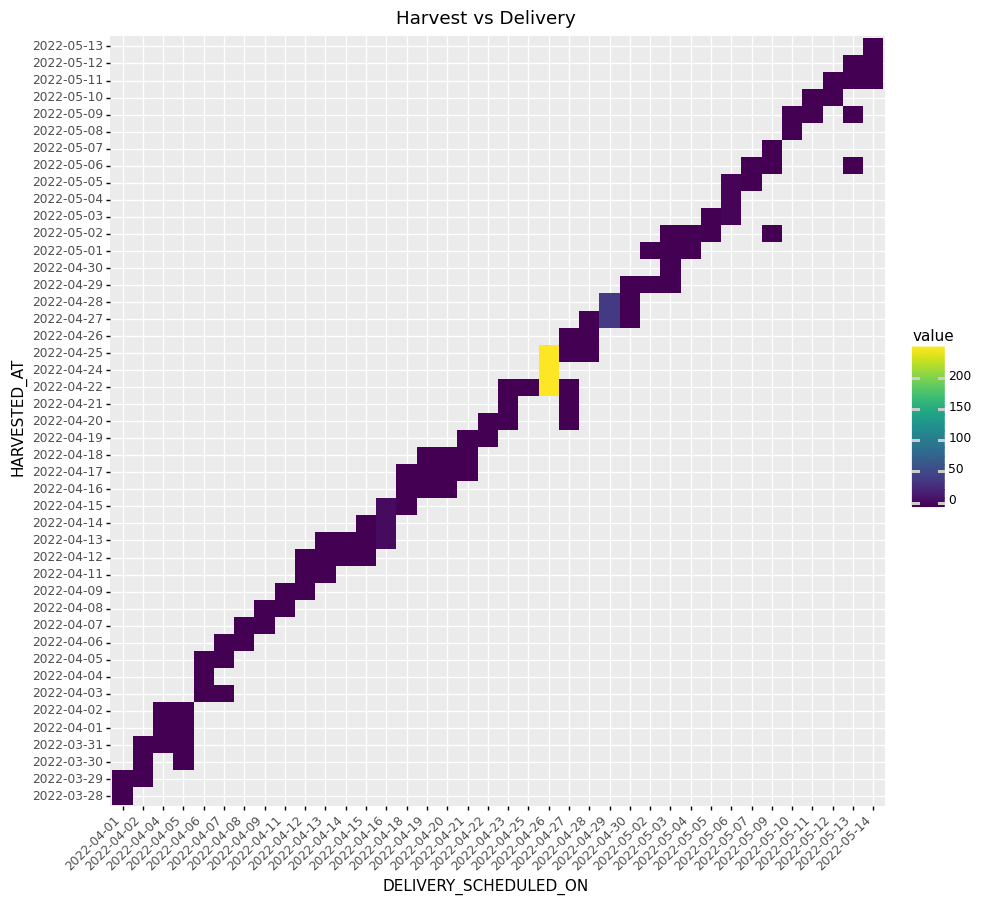

<ggplot: (387979358)>

In [205]:
(
    df
    
    .pipe(lambda x: pd.melt(x, id_vars=['DELIVERY_SCHEDULED_ON','HARVESTED_AT']))
    
    .assign(delivery_day_of_year = lambda x: pd.to_datetime(x['DELIVERY_SCHEDULED_ON']).apply(lambda y: y.dayofyear))
    .assign(harvest_day_of_year = lambda x: pd.to_datetime(x['HARVESTED_AT']).apply(lambda y: y.dayofyear))

    .pipe(lambda x: ggplot(x.query('variable=="SUM_WEIGHT_SHORTFALL_LBS"'), aes(x='DELIVERY_SCHEDULED_ON',y='HARVESTED_AT',fill='value'))
         + geom_tile()
         + theme(axis_text_x = element_text(hjust=1,rotation=45),
                 figure_size=(10,10))
         + ggtitle("Harvest vs Delivery"))
)

In [211]:
bin_inventory

,FARM_ID,COMPONENT_NAME,BIN_INVENTORY_DAY,value,variable
0,1,Basil,2022-04-02,2.610275,bin_inventory_lbs_5am
1,1,Basil,2022-04-25,3.430396,bin_inventory_lbs_5am
2,1,Flat Leaf Parsley,2022-04-25,1.340412,bin_inventory_lbs_5am
3,1,Cilantro,2022-04-25,3.593538,bin_inventory_lbs_5am
4,1,Purple Mustard,2022-04-25,15.890933,bin_inventory_lbs_5am
...,...,...,...,...,...
215,1,Basil,2022-04-20,3.412759,bin_inventory_lbs_5am
216,1,Cilantro,2022-04-08,3.037972,bin_inventory_lbs_5am
217,1,Flat Leaf Parsley,2022-04-16,0.361558,bin_inventory_lbs_5am
218,1,Flat Leaf Parsley,2022-04-17,0.361558,bin_inventory_lbs_5am
